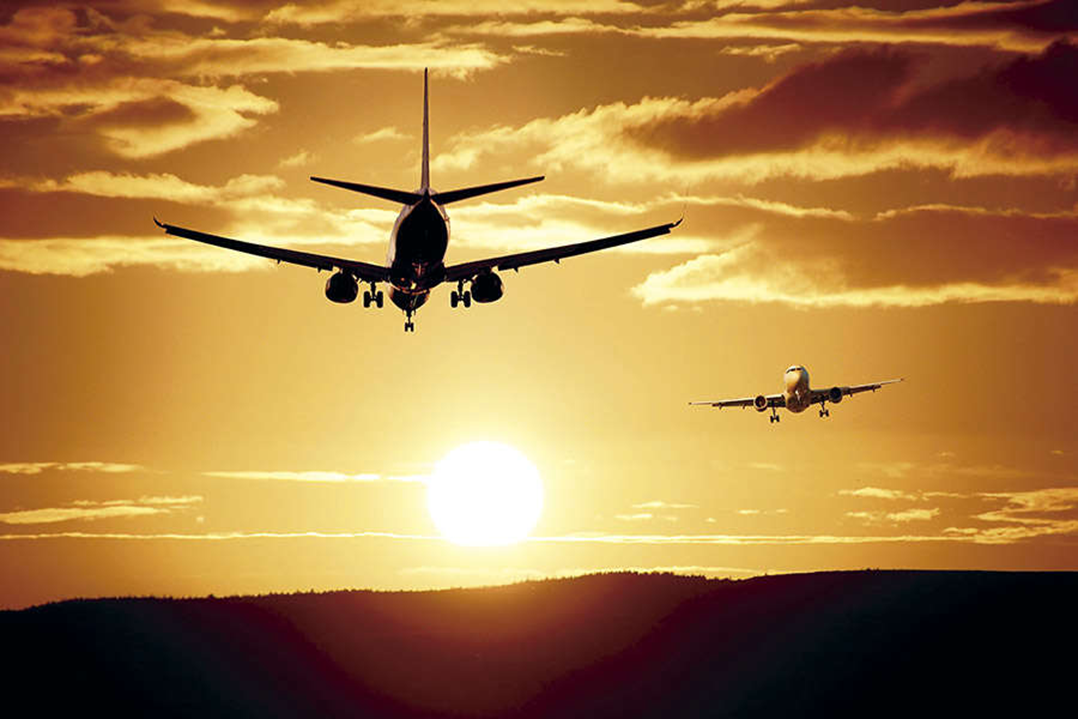

# **Predicción del retraso de las salidas y llegadas de las líneas aéreas**

## Objetivo

Desarrollar una solución de Inteligencia Artificial con interfaz gráfica y disponible en la web, que prediga de forma inmediata y personalizada la predicción de los retrasos que las líneas aéreas (*) tienen a la hora de salir y llegar en los distintos aeropuertos.

El dataset puede ser personalizado según se requiera, así como la cantidad de aerolíneas y demás datos que a fecha de hoy hemos podido recolectar en los distintos dataset que usaremos a lo largo del proyecto.

## Finalidad

Utilizando una plataforma inteligente basada en modelos avanzados de Machine Learning desarrollados en Python y ofreciendo acceso a través de una interfaz gráfica publicada en Hugging Face, para predecir los retrasos de los vuelos tanto en las salidas como las llegadas, beneficia a los clientes y a las aerolíneas

## Descripcion de los datos
|Reg   |Campo|Descripción|
|------|---|---|
|01|    FlightDate|Fecha del vuelo|
|02|	Day_Of_Week|        	    	    Dia de la semana del vuelo|
|03|	Airline|		                    Nombre Aerolínea|
|04|	Tail_Number|	    	            ID del vuelo|
|5-6|	Dep_Airport	- Arr_Airport|	        Código Aeropuerto de salida y llegada|
|7-8|	Dep_CityName - Arr_CityName|	    Ciudad de salida y llegada|
|09|	DepTime_label|  		            Hora original de salida|
|10-11|	Dep_Delay - Arr_Delay|	            Retraso salida y llegada|
|12|	Dep_Delay_Tag|		                Marca retraso salida|
|13-14|	Dep_Delay_Type - Arr_Delay_Type|	Tipo de retraso salida y llegada|
|15|	Flight_Duration|    		        Duración del vuelo|
|16|	Distance_type|          		    Distancia|
|17|	Delay_Carrier|		                Retraso por el carrier|
|18|	Delay_Weather|		                Retraso por condiciones meteo|
|19|	Delay_NAS (*)|          	        Retraso por National Airspace System|
|20|	Delay_Security|              		Retraso por seguridad|
|21|	Delay_LastAircraft|	    	        Retraso por el avión|
|22|	Manufacturer|		                Fabricante del avión|
|23|	Model|              		        Modelo del avión|
|24|	Aicraft_age|            		    Antigüedad del avión|
|25-26|	Dep_AIRPORT - Arr_AIRPORT|    	    Nombre Aeropuerto de salida y llegada|
|27-28|	Dep_CITY - Arr_CITY|	            Ciudad de salida y llegada|
|29-30|	Dep_STATE - Arr_STATE|      	    Estado de salida y llegada|
|31-32|	Dep_COUNTRY - Arr_COUNTRY|    	    País de salida y llegada|
|33-34|	Dep_LATITUDE - Arr_LATITUDE|   	Latitud de salida y llegada|
|35-36|	Dep_LONGITUDE - Arr_LONGITUDE|	    Longitud de salida y llegada|
|37-38|	Dep_tavg - Arr_tavg|              	Temperatura promedio en salida y llegada|
|39-40|	Dep_tmin - Arr_tmin|           	Temperatura mínima en salida y llegada|
|41-42|	Dep_tmax - Arr_tmax|       	    Temperatura máxima en salida y llegada|
|43-44|	Dep_prcp - Arr_prcp|   	        Precipitación en salida y llegada|
|45-46|	Dep_snow - Arr_snow|	            Cantidad de nieve en salida y llegada|
|47-48|	Dep_wdir - Arr_wdir|	            Dirección del viento en salida y llegada|
|29-50|	Dep_wspd - Arr_wspd|	            Velocidad del viento en salida y llegada|
|51-52|	Dep_pres - Arr_pres|	            Presión barométrica en salida y llegada|

- Reg 10..11 son los campos a predecir.
- Reg 02..03-22..26 son los campos que se podrán modificar en la interfaz por parte del usuario.
- (*) Retraso NAS se refiere a los retrasos en el sistema nacional aeroespacial, en sus siglas en inglés NAS (National Airspace System), 

# **Installing and Importing the necessary libraries**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import time

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# os related functionalities
import os
from pathlib import Path

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# To create the pipeline
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline

# Libraries different ensemble classifiers
from sklearn.ensemble import (RandomForestRegressor,
                              GradientBoostingRegressor, 
                              AdaBoostRegressor,
                              ExtraTreesRegressor,
                              BaggingRegressor)

# To tune different models and standardize
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

# Libraries to get different metric scores
from sklearn.metrics import (confusion_matrix,
                             accuracy_score,
                             precision_score,
                             recall_score,
                             f1_score,
                             mean_squared_error,
                             mean_absolute_error,
                             r2_score,
                             mean_absolute_percentage_error)

import xgboost
from xgboost import XGBRegressor

import werkzeug
import flask
import gunicorn
import streamlit
from importlib.metadata import version

# to copy files between directories
import shutil
import glob

# To serialize the model
import joblib

# API request
import requests

# for hugging face space authentication to upload files
from huggingface_hub import login, HfApi, create_repo

# obtener la distancia entre las coordenadas gps
from haversine import haversine

# to create correlation network graphs
import networkx as nx

# Manual autocorrelation calculation (without statsmodels)
from scipy import stats  # Usually comes with scipy

from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


import gradio as gr
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# setting start time
time_ini = time.time()

# **Loading the dataset**

In [ ]:
# Rutas de archivos
folder_path = "dataset/"
vuelos = folder_path+"df_flights_merged.csv"

In [ ]:
# Leer archivos CSV
df_vuelos = pd.read_csv(vuelos)

# copying the file to another df
data = df_vuelos.copy()

# **Data Overview**

In [ ]:
# displaying 5 lines
print('1st 5 lines\n', data.head(5))

In [ ]:
print('Last 5 lines\n', data.tail(5))

In [ ]:
# df information
data.info()

In [ ]:
# double checking for missing values
data.isnull().count()

In [ ]:
data.isnull().sum()

In [ ]:
count_int = (data.dtypes == 'int64').sum()
count_flo = (data.dtypes == 'float64').sum()
count_obj = (data.dtypes == 'object').sum()

print(f"Number of int64 columns: {count_int}")
print(f"Number of float64 columns: {count_flo}")
print(f"Number of object columns: {count_obj}")

- Non-null values
- 31 numeric columns
- 21 are objects

In [ ]:
# df number description
data.describe().T

In [ ]:
# let's see all of them
data.describe(include="all").T

# Análisis Exploratorio usando los datos de describe

# **Resumen Ejecutivo - Análisis de los datos de Vuelos**

## **📊 Descripción General del Dataset**
- **Total de registros**: 6,743,404 vuelos
- **Período**: 365 días (año 2023)
- **Fecha con más vuelos**: 26 de noviembre de 2023 (20,511 vuelos)

## **✈️ Información de Aerolíneas y Aviones**
- **Cantidad de Aerolíneas**: 15
- **Aerolínea líder**: Southwest Airlines Co. (1,421,238 vuelos - 21.1%)
- **Cantidad de TAGs**: 5,963
- **Avión más utilizado**: N488HA (3,327 vuelos)
- **Fabricantes**: 5 (BOEING domina con 3,122,320 vuelos - 46.3%)
- **Cantidad de modelos**: 21 (737 NG es el más común - 2,703,494 vuelos)
- **Edad promedio de los aviones**: 13.5 años (rango: 1-57 años)

## **🌍 Información Geográfica**
- **Cantidad de Aeropuertos**: 350
- **Cantidad de Ciudades**: 344
- **Cantidad de Estados**: 54 (CA es el más frecuente con ~730,000 vuelos)
- **Países**: Solo USA
- **Aeropuerto más transitado**: Hartsfield-Jackson Atlanta International (ATL)
- **Ciudad más conectada**: Chicago, IL

## **⏰ Características de Tiempo y Duración**
- **Día de semana promedio**: ~4 (miércoles/jueves) (este valor va de 1 al 7)
- **Horario de salida**: Morning es el más común (2,611,567 vuelos - 38.7%)
- **Duración promedio de vuelo**: 140.3 minutos (2.3 horas)
- **Tipo de distancia**: Domin el Short Haul (>1500Mi) (5,872,159 vuelos - 87.1%)

## **🚀 Retrasos en Vuelos**
### **Retrasos en Salida (dep_delay_min)**
- **Promedio**: 12.2 minutos
- **Desviación estándar**: 55.1 minutos (alta variabilidad)
- **Mediana**: -2 minutos (la mayoría sale antes de tiempo)
- **Rango**: -99 a 4,413 minutos
- **% de vuelos con retraso**: 37.9% (dep_delay_tag)

### **Retrasos en Llegada (arr_delay_min)**
- **Promedio**: 6.6 minutos (menor que salida)
- **Desviación estándar**: 57.1 minutos
- **Mediana**: -6 minutos (la mayoría llega antes de tiempo)
- **Rango**: -119 a 4,405 minutos
- **Tipo de retraso más común**: "Low <5min" (5,403,727 vuelos - 80.1%)

## **🔍 Causas de Retrasos (en minutos)**
1. **Aeronave anterior**: 5.68 min (principal causa)
2. **Aerolínea**: 5.17 min
3. **Sistema Nacional de Aviación**: 2.57 min
4. **Clima**: 0.74 min
5. **Seguridad**: 0.03 min

## **🌤️ Condiciones Meteorológicas**
### **Temperaturas (en °C)**
- **Promedio**: ~16.8°C
- **Mínima promedio**: ~11.8°C
- **Máxima promedio**: ~22.2°C
- **Extremos**: -76°C a 50°C

### **Precipitación y Nieve**
- **Precipitación promedio**: 2.44 mm
- **Nieve promedio**: 3.22 mm
- **Valores máximos**: 571.5 mm (precipitación), 1,780 mm (nieve)

### **Viento y Presión**
- **Dirección del viento promedio**: ~189° (sur-suroeste)
- **Velocidad del viento promedio**: 12.48 km/h
- **Presión atmosférica promedio**: 1015.73 hPa

## **🎯 Hallazgos Clave**

### **Positivos:**
1. **Eficiencia general**: La mediana de retrasos es negativa (los vuelos suelen ser puntuales o adelantados)
2. **Consistencia geográfica**: La distribución entre aeropuertos es balanceada
3. **Seguridad operacional**: Los retrasos por seguridad son mínimos (0.03 min promedio)

### **Áreas de Oportunidad:**
1. **Alta variabilidad en retrasos**: Hay desviaciones altas, inconsistencia o retrasos grandes muy puntuales
2. **Retrasos por aeronave anterior**: Esta es la principal causa de demoras (5.68 min promedio)
3. **Extremos climáticos**: Las condiciones meteorológicas extremas afectan las operaciones

### **Insights para Optimización:**
1. **Programación**: Mejorar la coordinación entre los vuelos consecutivos para reducir retrasos por aeronave anterior
2. **Mantenimiento**: Los aviones más viejos (hasta 57 años) pueden requerir una atención especial
3. **Clima**: Se requiere una buena planificación cuando las condiciones meteo son extremas (-76°C a 50°C)

## **📈 Metodología de Análisis**
El análisis considera datos completos (sin valores nulos) con:
- Estadísticas descriptivas para variables numéricas
- Conteos de frecuencia para variables categóricas
- Distribuciones temporales y geográficas
- Análisis de causas y efectos de retrasos

---

**Nota**: Este resumen se basa en estadísticas descriptivas de 6.74 millones de vuelos durante el 2023, proporcionando una visión general del desempeño operacional de la industria aérea en USA.

In [ ]:
# checking for duplicated values
print('Duplicates:', data.duplicated().sum())

In [ ]:
# After checking duplicates, drop them (keeping first occurrence)
data_cleaned = data.drop_duplicates()
print(f"Original shape: {data.shape[0]}")
print(f"After dropping duplicates: {data_cleaned.shape}")
print(f"Rows removed: {data.shape[0] - data_cleaned.shape[0]}")

In [ ]:
print(f"◀ Old df ➡️ {data.shape[0]} rows and {data.shape[1]} columns.")
print(f"▶ New df ➡️ {data_cleaned.shape[0]} rows and {data_cleaned.shape[1]} columns.")

### Convertimos flight_date a formato fecha.
### Agregamos una columna con los nombres del día de la semana para una mejor lectura en lugar de ser números.

In [ ]:
# Date - convert to datetime, not categorical
data_cleaned['flight_date'] = pd.to_datetime(data_cleaned['flight_date'])
print(f"Converted flight_date to datetime")

In [ ]:
# First, let's convert day_of_week_num to integer
data_cleaned['day_of_week_num'] = data_cleaned['day_of_week_num'].astype(int)

# Create mapping from day number to weekday name
day_name_mapping = {1: 'Monday',
                    2: 'Tuesday',
                    3: 'Wednesday',
                    4: 'Thursday',
                    5: 'Friday',
                    6: 'Saturday',
                    7: 'Sunday'}

# Create new column with weekday names
data_cleaned['day_of_week_name'] = data_cleaned['day_of_week_num'].map(day_name_mapping)

In [ ]:
data_cleaned.info()

# Explicación datos duplicados
Se han eliminado 31 filas identicas en todo el dataset que contiene mas de 6 millones de filas. Es un dato irrelevante pero elimina desviaciones a la hora de la predicción.

# Analizamos los datos para ver cuales debemos convertir de object a category

In [ ]:
# Check unique values per column
for col in data_cleaned.select_dtypes(include=['object']).columns:
    unique_count = data_cleaned[col].nunique()
    print(f"{col}: {unique_count:,} unique values")
    
    if unique_count > 100:
        print(f"  ⚠️  High cardinality - may not benefit from categorical")
    elif unique_count < 20:
        print(f"  ✅ Good candidate for categorical")

In [ ]:
object_cols = data_cleaned.select_dtypes(include=['object']).columns.tolist()
print("Object columns analysis:")
print("="*60)

categorical_candidates = []
categorical_consinder = []
keep_as_object = []

for col in object_cols:
    unique_vals = data_cleaned[col].nunique()
    sample_vals = data_cleaned[col].dropna().unique()[:3] if unique_vals > 3 else data_cleaned[col].dropna().unique()
    
    print(f"\n{col}:")
    print(f"  Unique values:\t{unique_vals}")
    print(f"  Sample:\t\t{sample_vals}")
    print(f"  Null count:\t\t{data_cleaned[col].isnull().sum()}")
    
    # Decision logic
    if unique_vals <= 50:  # Good for categorical
        categorical_candidates.append(col)
        print(f"  ✅ RECOMMEND:\t\tConvert to categorical")
    elif unique_vals > 50 and unique_vals <= 100:
        print(f"  ⚠️ CONSIDER:\t\tMay benefit from categorical")
        categorical_consinder.append(col)
    else:
        keep_as_object.append(col)
        print(f"  ❌ KEEP AS OBJECT:\tToo many unique values")

print(f"\nSummary:")
print(f"Categorical candidates .... ({len(categorical_candidates)}): {categorical_candidates}")
print(f"Categorical to consider ... ({len(categorical_consinder)}): {categorical_consinder}")
print(f"Keep as object ............ ({len(keep_as_object)}): {keep_as_object}")

# Convertimos los campos object a category

In [ ]:
def convert_to_categorical_smart(df):
    """
    Smart conversion of object columns to categorical
    """
    df_processed = df.copy()
    
    # Convert low and medium cardinality
    for col in categorical_candidates:
        if col in df.columns:
            original_memory = df[col].memory_usage(deep=True)
            df_processed[col] = df_processed[col].astype('category')
            new_memory = df_processed[col].memory_usage(deep=True)
            savings = (1 - new_memory/original_memory) * 100
            print(f"Converted {col}: {savings:.1f}% memory saved")
    
    return df_processed

# Apply conversion
print("Resultados con las categorias recomendadas")
data_processed_1 = convert_to_categorical_smart(data_cleaned)

In [ ]:
def convert_to_categorical_smart(df):
    """
    Smart conversion of object columns to categorical
    """
    df_processed_2 = df.copy()
    
    # Convert low and medium cardinality
    for col in categorical_candidates + categorical_consinder:
        if col in df.columns:
            original_memory = df[col].memory_usage(deep=True)
            df_processed_2[col] = df_processed_2[col].astype('category')
            new_memory = df_processed_2[col].memory_usage(deep=True)
            savings = (1 - new_memory/original_memory) * 100
            print(f"Converted {col}: {savings:.1f}% memory saved")
    
    return df_processed_2

# Apply conversion
print("Resultados con las categorias recomendadas + consideradas")
data_processed_2 = convert_to_categorical_smart(data_cleaned)

In [ ]:
def convert_to_categorical_smart(df):
    """
    Smart conversion of object columns to categorical
    """
    df_processed_3 = df.copy()
    
    # Convert low and medium cardinality
    for col in categorical_candidates + categorical_consinder + keep_as_object:
        if col in df.columns:
            original_memory = df[col].memory_usage(deep=True)
            df_processed_3[col] = df_processed_3[col].astype('category')
            new_memory = df_processed_3[col].memory_usage(deep=True)
            savings = (1 - new_memory/original_memory) * 100
            print(f"Converted {col}: {savings:.1f}% memory saved")
    
    return df_processed_3

# Apply conversion
print("Resultados con todas las categorias")
data_processed_3 = convert_to_categorical_smart(data_cleaned)

In [ ]:
data_processed_3.info()

### Vamos a usar el df con las categorias que tienen hasta 100 coincidencias, que son las recomendadas y las consideradas.
### Las que tienen mas de 100 por ahora no las tomamos en cuenta.

In [ ]:
# Cambiar el data_processed según sea necesario por data_processed_n donde n=1,2 o 3
data_processed = data_processed_2.copy()

In [ ]:
# obtener la distancia entre las coordenadas gps
data_processed["route_distance_km"] = data_processed.apply(lambda r: haversine((r.dep_latitude, r.dep_longitude),
                                                                               (r.arr_latitude, r.arr_longitude)),
                                                           axis=1)

In [ ]:
data_processed.tail()

In [ ]:
# Continue with your one-hot encoding...
# Create OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, categories=[list(range(1, 8))])

# Fit and transform
day_encoded = encoder.fit_transform(data_processed[['day_of_week_num']])

# Create DataFrame with proper column names
day_df = pd.DataFrame(day_encoded, 
                      columns = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
                      index = data_processed.index)

# Keep both numeric and name columns, and add one-hot encoded columns
data_processed = pd.concat([data_processed, day_df], axis=1) #wihtout dropping the column day_of_week_num
#data_processed = pd.concat([data_processed.drop('day_of_week_num', axis=1), day_df], axis=1)

In [ ]:
data_processed.tail()

In [ ]:
data_processed.info()

# **Exploratory Data Analysis (EDA)**

## Univariate Analysis

In [ ]:
# Target = departure or arrival delays
def basic_field_analysis(df, target):
    """
    Basic analysis of each field
    """

    print("="*80)
    print("BASIC FIELD ANALYSIS for "+target)
    print("="*80)
    
    results = {}
    
    for column in df.columns:
        print(f"\n📊 {column}")
        print(f"   Dtype: {df[column].dtype}")
        print(f"   Missing: {df[column].isnull().sum():,} ({df[column].isnull().mean()*100:.2f}%)")
        
        # Numerical analysis
        if pd.api.types.is_numeric_dtype(df[column]):
            print(f"   Mean: {df[column].mean():.2f}")
            print(f"   Std: {df[column].std():.2f}")
            print(f"   Min: {df[column].min():.2f}")
            print(f"   Max: {df[column].max():.2f}")
            
            # Correlation with target
            if column != target and target in df.columns:
                correlation = df[column].corr(df[target])
                print(f"   Correlation with {target}: {correlation:.3f}")
                
                # Store for later
                results[column] = {
                    'type': 'numeric',
                    'correlation': correlation,
                    'missing_pct': df[column].isnull().mean()
                }
        
        # Categorical analysis
        elif pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':
            unique_count = df[column].nunique()
            print(f"   Unique values: {unique_count}")
            
            if unique_count <= 10:
                print(f"   Value counts:")
                for val, count in df[column].value_counts().head(10).items():
                    print(f"     {val}: {count:,} ({count/len(df)*100:.1f}%)")
            
            # For categorical-target relationship
            if column != target and target in df.columns and unique_count <= 20:
                # Mean target by category
                mean_target = df.groupby(column)[target].mean()
                print(f"   Mean {target} by category:")
                for val, mean_val in mean_target.sort_values().items():
                    print(f"     {val}: {mean_val:.1f}")
                
                results[column] = {
                    'type': 'categorical',
                    'unique_count': unique_count,
                    'target_variance': mean_target.std()
                }
    
    return results

In [ ]:
# Run basic analysis for departure
basic_results = basic_field_analysis(data_processed, 'dep_delay_min')

In [ ]:
# Run basic analysis for arrival
basic_results = basic_field_analysis(data_processed, 'arr_delay_min')

In [ ]:
# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# First, let's identify numerical columns
numerical_cols = data_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Found {len(numerical_cols)} numerical columns")

# Create correlation matrix
corr_matrix = data_processed[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,
            mask = mask,
            annot = True,
            fmt = '.2f',
            cmap = 'RdBu_r', 
            center = 0,
            square = True,
            linewidths = 0.5,
            cbar_kws = {"shrink": 0.8})

plt.title('Correlation Matrix of All Numerical Features', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Analisis de **correlation matrix**

---

## 1. Strongest Relationships (Expected & Important)

### 🔴 Delay-related variables

* **`dep_delay_min` ↔ `arr_delay_min` (~0.97)**
  → Extremely strong correlation. Departure delays almost fully propagate to arrival delays.

* **`dep_delay_min` ↔ `delay_carrier_min` (~0.72)**

* **`dep_delay_min` ↔ `delay_last_aircraft_min` (~0.63)**
  → Carrier issues and late inbound aircraft are major contributors to departure delays.

* **`arr_delay_min` ↔ `delay_carrier_min` (~0.70)**

* **`arr_delay_min` ↔ `delay_last_aircraft_min` (~0.62)**
  → Same causes strongly affect arrival delays.

📌 **Insight**: Delay cause variables are highly collinear with total delay minutes.

---

## 2. Delay Causes vs Each Other

* Moderate correlations among:

  * `delay_carrier_min`
  * `delay_weather_min`
  * `delay_nas_min`
  * `delay_last_aircraft_min`

But:

* **`delay_security_min` ≈ 0 correlation** with almost everything
  → Security delays are rare and mostly independent.

📌 **Insight**: Delay causes are related but not identical—useful for explanatory models, risky for linear models without regularization.

---

## 3. Weather Variables (Very High Collinearity)

### 🌡️ Temperature

* `dep_temp_avg`, `dep_temp_min`, `dep_temp_max`
  → Correlations ≈ **0.97**
* Same for arrival temperatures.

📌 **Insight**: These are essentially redundant. Keep **one** (usually avg or max).

### 🌬️ Wind

* `wind_speed` vs `wind_dir` → near zero correlation
* Wind has **weak correlation with delays** overall.

### 🌧️ Precipitation & Snow

* `precip` ↔ `snow`: small to moderate correlation
* **Weak correlation with delays** (generally < 0.1)

📌 **Insight**: Weather affects delays nonlinearly or conditionally (e.g., extreme events), not well captured by simple correlations.

---

## 4. Geographic Features

* `dep_latitude` ↔ `arr_latitude` (~0.24)
* `dep_longitude` ↔ `arr_longitude` (~0.61)

📌 **Insight**: Flights tend to operate within geographic corridors, but location alone does not strongly explain delays.

---

## 5. Aircraft Features

* **`aircraft_age_years`** shows:

  * Near-zero correlation with delays
  * Slight negative correlation with flight duration (~ -0.15)

📌 **Insight**: Older aircraft are not strongly associated with more delays in this dataset.

---

## 6. Flight Duration

* `flight_duration_min` has:

  * Weak correlation with delays (~0.05)
  * Slight negative correlation with aircraft age

📌 **Insight**: Longer flights are not necessarily more delayed.

---

## 7. Time Feature

* **`day_of_week_num` ≈ 0 correlation with everything**

📌 **Insight**: Day-of-week effects are likely **categorical and nonlinear**, not ordinal.

---

## 8. Modeling Implications (Key Takeaways)

### ⚠️ Multicollinearity risks

* Do **not** include together:

  * `dep_delay_min` + `arr_delay_min`
  * Multiple temperature variables
  * All delay cause variables without regularization

### ✅ Recommended strategies

* Use **regularized models** (Ridge, Lasso, ElasticNet)
* Or **tree-based models** (Random Forest, XGBoost)
* Feature selection:

  * Keep `dep_delay_min` OR delay causes, not both
  * Keep one temperature metric per location

---

## Summary

**What matters most:**

* Delay causes (carrier, last aircraft)
* Departure delay → arrival delay

**What matters least (linearly):**

* Weather (except extreme cases)
* Aircraft age
* Day of week

# Correlation

In [ ]:
def correlation_target(target):
    corr_with_target = data_processed[numerical_cols].corr()[target].sort_values(ascending=False)

    # Bar plot - Figure 1
    plt.figure(1, figsize=(12, 8))
    colors = ['red' if x < 0 else 'green' for x in corr_with_target]
    bars = plt.barh(corr_with_target.index, corr_with_target.values, color=colors)
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    plt.xlabel('Correlation Coefficient')
    plt.title(f'Correlation with {target}', fontsize=16, pad=20)
    plt.grid(axis='x', alpha=0.3)

    # Add value labels
    for bar in bars:
        width = bar.get_width()
        plt.text(width,
                 bar.get_y() + bar.get_height()/2, 
                 f'{width:.3f}',
                 ha = 'left' if width >= 0 else 'right', 
                 va = 'center',
                 fontsize=9)

    plt.tight_layout()
    plt.show() # Shows figure 1


    # Print correlations
    print(f"\nTop 10 Positive Correlations with {target}:")
    print(corr_with_target.head(10))
    print(f"\nTop 10 Negative Correlations with {target}:")
    print(corr_with_target.tail(10))

    # Get top 6 correlated features
    top_features = corr_with_target.drop(target).abs().sort_values(ascending=False).head(6).index

    # Scatter plots - Figure 2
    plt.figure(2, figsize=(18, 12))
    
    for idx, feature in enumerate(top_features):
        plt.subplot(2, 3, idx + 1)
        
        # Sample data
        sample_size = min(5000, len(data_processed))
        sample_df = data_processed.sample(sample_size, random_state=42)
        
        # Scatter plot
        plt.scatter(sample_df[feature], sample_df[target], 
                    alpha=0.3, s=10, c=sample_df[target], 
                    cmap='viridis')
        
        # Add correlation line
        z = np.polyfit(sample_df[feature].dropna(), sample_df[target].dropna(), 1)
        p = np.poly1d(z)
        plt.plot(sample_df[feature], p(sample_df[feature]), "r--", linewidth=2)
        
        # Calculate and display correlation
        corr_value = data_processed[feature].corr(data_processed[target])
        plt.text(0.05, 0.95, f'ρ = {corr_value:.3f}', 
                 transform=plt.gca().transAxes, fontsize=12,
                 verticalalignment='top',
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.title(f'{feature} vs {target}')
        plt.grid(True, alpha=0.3)

    plt.suptitle(f'Top Correlated Features with {target}', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show() # Shows figure 2


    # Create correlation network for top features
    top_n = 15
    top_features = corr_with_target.abs().sort_values(ascending=False).head(top_n).index.tolist()

    # Create correlation matrix for top features
    top_corr = data_processed[top_features].corr()

    # Create graph
    G = nx.Graph()

    # Add nodes
    for feature in top_features:
        G.add_node(feature, size=abs(corr_with_target[feature])*1000)

    # Add edges (only strong correlations)
    threshold = 0.3
    for i in range(len(top_features)):
        for j in range(i+1, len(top_features)):
            corr_value = top_corr.iloc[i, j]
            if abs(corr_value) > threshold:
                G.add_edge(top_features[i], top_features[j], 
                        weight=abs(corr_value)*5,
                        color='red' if corr_value < 0 else 'blue')

    # Plot network
    plt.figure(3, figsize=(14, 10))
    pos = nx.spring_layout(G, k=2, iterations=50)

    # Node sizes based on correlation with target
    node_sizes = [G.nodes[node]['size'] for node in G.nodes()]
    node_colors = ['green' if corr_with_target[node] > 0 else 'red' for node in G.nodes()]

    # Draw graph
    nx.draw_networkx_nodes(G,
                           pos,
                           node_size = node_sizes, 
                           node_color = node_colors,
                           alpha = 0.8)
    nx.draw_networkx_edges(G,
                           pos,
                           width = [G[u][v]['weight'] for u, v in G.edges()],
                           edge_color = [G[u][v]['color'] for u, v in G.edges()],
                           alpha = 0.5)
    nx.draw_networkx_labels(G,
                            pos,
                            font_size=10,
                            font_weight='bold')

    plt.title(f'Correlation Network of Top {top_n} Features\n'
            f'(Node size ∝ correlation with {target}, '
            f'Edges: |ρ| > {threshold})', fontsize=14, pad=20)
    plt.axis('off')
    plt.tight_layout()
    plt.show() # Shows figure 3

In [ ]:
# Calculate correlation with target as dep_delay_min
correlation_target('dep_delay_min')

Here’s a **clear, ML-focused analysis** of the **correlation with `dep_delay_min`** plot you shared, plus **what it means for your model and app**.

---

## 1. Big Picture (One Sentence)

> **Departure delay is dominated by operational delay causes and arrival delay, while weather, geography, aircraft, and calendar effects are weak in linear correlation.**

This is exactly what we expect in real airline data.

---

## 2. Very Strong Correlations (⚠️ Leakage Zone)

These features are **not usable for pre-departure prediction**.

| Feature                   | Corr     | Meaning                                      |
| ------------------------- | -------- | -------------------------------------------- |
| `arr_delay_min`           | **0.97** | Arrival delay almost mirrors departure delay |
| `delay_carrier_min`       | **0.72** | Airline operational issues                   |
| `delay_last_aircraft_min` | **0.63** | Late inbound aircraft                        |
| `dep_delay_tag`           | **0.40** | Engineered label derived from delay          |
| `delay_weather_min`       | **0.27** | Post-hoc weather attribution                 |
| `delay_nas_min`           | **0.24** | Air traffic control                          |

📌 **Conclusion**
These are **effects**, not causes. Including them = **label leakage**.

---

## 3. Weak but Legitimate Predictors (Keep for ML)

These have low correlation but **add value in nonlinear models**.

### 🌦️ Weather (Weak Linear Signal ≠ Useless)

| Feature      | Corr       |
| ------------ | ---------- |
| `dep_precip` | 0.06       |
| `dep_temp_*` | ~0.04–0.05 |
| `wind_speed` | ~0.02      |

✔ Useful for:

* Tree-based models
* Threshold-based features (snow, freezing, storms)

---

### 🛫 Flight & Aircraft

| Feature               | Corr  |
| --------------------- | ----- |
| `flight_duration_min` | 0.035 |
| `aircraft_age_years`  | 0.014 |

✔ Aircraft age is **weak globally**, but useful with:

* Airline interaction
* Aircraft model grouping

---

### 📍 Geography

| Feature    | Corr  |
| ---------- | ----- |
| Lat / Long | ~0.02 |

✔ Useful only when converted to:

* Airport-level congestion
* Route embeddings
* Distance

---

### 📅 Calendar

| Feature           | Corr  |
| ----------------- | ----- |
| `day_of_week_num` | 0.019 |

❌ Linear encoding is wrong
✔ Needs categorical or cyclical encoding

In [ ]:
# Calculate correlation with target as arr_delay_min
correlation_target('arr_delay_min')

This plot is **excellent confirmation** of everything we discussed. I’ll analyze it **specifically for predicting `arr_delay_min`**, and then give you **exact modeling rules** you should follow.

---

## 1. Big Picture

> **Arrival delay is overwhelmingly explained by departure delay and operational delay causes; weather, aircraft, geography, and calendar effects are weak in linear correlation.**

This is exactly what airlines see in practice.

---

## 2. Dominant Predictors (⚠️ Leakage Unless Timed Correctly)

| Feature                   | Corr     | Interpretation                          |
| ------------------------- | -------- | --------------------------------------- |
| `dep_delay_min`           | **0.97** | Departure delay almost fully propagates |
| `delay_carrier_min`       | **0.70** | Airline operational recovery            |
| `delay_last_aircraft_min` | **0.62** | Inbound aircraft delay                  |
| `dep_delay_tag`           | **0.39** | Engineered label                        |
| `delay_nas_min`           | **0.33** | ATC congestion                          |
| `delay_weather_min`       | **0.27** | Post-hoc weather attribution            |

📌 **Critical rule**

* These are **not available pre-departure**
* Using them early = **data leakage**

---

## 3. Legitimate Pre-Departure Signals (Weak but Real)

### 🌦️ Weather

| Feature      | Corr       |
| ------------ | ---------- |
| `dep_precip` | 0.074      |
| `arr_precip` | 0.062      |
| Temps        | ~0.05      |
| Wind         | ~0.02–0.03 |

✔ Weak linearly
✔ Strong in nonlinear trees and thresholds

---

### ✈️ Flight & Aircraft

| Feature               | Corr  |
| --------------------- | ----- |
| `flight_duration_min` | 0.053 |
| `aircraft_age_years`  | 0.013 |

✔ Duration matters more than age

---

### 📍 Geography

| Feature  | Corr       |
| -------- | ---------- |
| lat/long | ~0.01–0.02 |

✔ Needs aggregation to airport level

---

### 📅 Calendar

| Feature           | Corr  |
| ----------------- | ----- |
| `day_of_week_num` | 0.021 |

❌ Ordinal encoding wrong
✔ Use categorical/cyclical

In [ ]:
# Select key delay-related features
delay_features = ['dep_delay_min',
                  'arr_delay_min',
                  'delay_carrier_min',
                  'delay_weather_min',
                  'delay_nas_min',
                  'delay_last_aircraft_min',
                  'flight_duration_min',
                  'aircraft_age_years',
                  'route_distance_km'] #int64 columns only

# Filter to existing columns
delay_features = [f for f in delay_features if f in data_processed.columns]

# Create pairplot
print(f"Creating pairplot for {len(delay_features)} delay features...")
sample_df = data_processed[delay_features].sample(min(1000, len(data_processed)), random_state=42)

g = sns.pairplot(sample_df, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 20})
g.fig.suptitle('Pairplot of Delay-Related Features', y=1.02, fontsize=16)

# Add correlation coefficients to upper triangle
for i, row in enumerate(g.axes):
    for j, col in enumerate(row):
        if i < j:  # Upper triangle
            x_feature = delay_features[j]
            y_feature = delay_features[i]
            corr = data_processed[x_feature].corr(data_processed[y_feature])
            col.text(0.5, 0.9, f'ρ = {corr:.2f}', 
                    transform=col.transAxes, ha='center',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

In [ ]:
# Select key delay-related features
delay_features = ['dep_delay_min',
                  'arr_delay_min',
                  'dep_temp_avg',
                  'dep_temp_min',
                  'dep_temp_max',
                  'dep_precip',
                  'dep_snow',
                  'dep_wind_dir',
                  'dep_wind_speed',
                  'dep_pressure'] #float64 columns only

# Filter to existing columns
delay_features = [f for f in delay_features if f in data_processed.columns]

# Create pairplot
print(f"Creating pairplot for {len(delay_features)} delay features...")
sample_df = data_processed[delay_features].sample(min(1000, len(data_processed)), random_state=42)

g = sns.pairplot(sample_df, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 20})
g.fig.suptitle('Pairplot of Delay-Related Features', y=1.02, fontsize=16)

# Add correlation coefficients to upper triangle
for i, row in enumerate(g.axes):
    for j, col in enumerate(row):
        if i < j:  # Upper triangle
            x_feature = delay_features[j]
            y_feature = delay_features[i]
            corr = data_processed[x_feature].corr(data_processed[y_feature])
            col.text(0.5, 0.9, f'ρ = {corr:.2f}', 
                    transform=col.transAxes, ha='center',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

In [ ]:
# Select key delay-related features
delay_features = ['dep_delay_min',
                  'arr_delay_min',
                  'arr_temp_avg',
                  'arr_temp_min',
                  'arr_temp_max',
                  'arr_precip',
                  'arr_snow',
                  'arr_wind_dir',
                  'arr_wind_speed',
                  'arr_pressure'] #float64 columns only

# Filter to existing columns
delay_features = [f for f in delay_features if f in data_processed.columns]

# Create pairplot
print(f"Creating pairplot for {len(delay_features)} delay features...")
sample_df = data_processed[delay_features].sample(min(1000, len(data_processed)), random_state=42)

g = sns.pairplot(sample_df, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 20})
g.fig.suptitle('Pairplot of Delay-Related Features', y=1.02, fontsize=16)

# Add correlation coefficients to upper triangle
for i, row in enumerate(g.axes):
    for j, col in enumerate(row):
        if i < j:  # Upper triangle
            x_feature = delay_features[j]
            y_feature = delay_features[i]
            corr = data_processed[x_feature].corr(data_processed[y_feature])
            col.text(0.5, 0.9, f'ρ = {corr:.2f}', 
                    transform=col.transAxes, ha='center',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

In [ ]:
# Extract time features
df_time = data_processed.copy()
def extract_time_features(target):
    # Create time-based features
    if 'flight_date' in df_time.columns:
        df_time['month'] = df_time['flight_date'].dt.month
        df_time['day_of_month'] = df_time['flight_date'].dt.day
        df_time['is_weekend'] = (df_time['day_of_week_num'] >= 6).astype(int)
        
        # Analyze delay by time
        time_features = ['month', 'day_of_month', 'day_of_week_num', 'is_weekend']
        
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        axes = axes.flatten()
        
        for idx, feature in enumerate(time_features):
            if idx < len(axes):
                ax = axes[idx]
                
                # Calculate mean delay by time feature
                if df_time[feature].nunique() <= 31:  # Reasonable for boxplot
                    delay_by_feature = df_time.groupby(feature)[target].agg(['mean', 'std', 'count'])
                    
                    # Bar plot with error bars
                    bars = ax.bar(delay_by_feature.index, delay_by_feature['mean'], 
                                yerr=delay_by_feature['std'], 
                                capsize=5, alpha=0.7, 
                                color='skyblue', edgecolor='navy')
                    
                    ax.set_xlabel(feature)
                    ax.set_ylabel(f'Mean {target}')
                    ax.set_title(f'{target} by {feature}')
                    ax.grid(True, alpha=0.3)
                    
                    # Add count labels
                    for bar, count in zip(bars, delay_by_feature['count']):
                        height = bar.get_height()
                        ax.text(bar.get_x() + bar.get_width()/2, height,
                            f'n={int(count):,}', ha='center', va='bottom',
                            fontsize=8)
        
        plt.suptitle(f'Time-Based Analysis of {target}', fontsize=16, y=1.02)
        plt.tight_layout()
        plt.show()

In [ ]:
extract_time_features('dep_delay_min')

In [ ]:
extract_time_features('arr_delay_min')

In [ ]:
# Analyze categorical features
categorical_cols = data_processed.select_dtypes(include=['object', 'category']).columns.tolist()
def categorical_feature_analysis(target):
    """
    Analyze categorical features against target
    """
    print("="*80)
    print(f"CATEGORICAL FEATURE ANALYSIS for {target}")
    print("="*80)
    
    # Select categoricals with reasonable cardinality
    cat_features = [col for col in categorical_cols if data_processed[col].nunique() <= 20]

    if cat_features:
        # Calculate mean delay by category (ANOVA-like)
        fig, axes = plt.subplots(len(cat_features), 1, figsize=(14, 4*len(cat_features)))
        if len(cat_features) == 1:
            axes = [axes]
        
        for idx, feature in enumerate(cat_features):
            ax = axes[idx]
            
            # Calculate statistics
            stats_df = data_processed.groupby(feature)[target].agg(['mean', 'std', 'count']).sort_values('mean')
            
            # Create bar plot
            bars = ax.bar(range(len(stats_df)), stats_df['mean'], 
                        yerr=stats_df['std'], capsize=5,
                        color='lightcoral', edgecolor='darkred', alpha=0.7)
            
            ax.set_xticks(range(len(stats_df)))
            ax.set_xticklabels(stats_df.index, rotation=45, ha='right')
            ax.set_ylabel(f'Mean {target}')
            ax.set_title(f'{target} by {feature} (F-value: {stats_df["mean"].var():.1f})')
            ax.grid(True, alpha=0.3, axis='y')
            
            # Add value labels
            for i, (mean_val, count) in enumerate(zip(stats_df['mean'], stats_df['count'])):
                ax.text(i, mean_val, f'{mean_val:.1f}', ha='center', va='bottom')
                ax.text(i, 0, f'n={int(count):,}', ha='center', va='top', 
                    fontsize=8, rotation=90)
        
        plt.suptitle(f'Categorical Feature Analysis with {target}', fontsize=16, y=1.02)
        plt.tight_layout()
        plt.show()

In [ ]:
categorical_feature_analysis('dep_delay_min')

In [ ]:
categorical_feature_analysis('arr_delay_min')

In [ ]:
# Analyze autocorrelation time series data
def autocorrelation_analysis(target):
    """
    Autocorrelation analysis of daily average delay
    """
    if 'flight_date' in data_processed.columns:
        # Sort by date
        df_sorted = data_processed.sort_values('flight_date').copy()
        df_sorted['date'] = df_sorted['flight_date'].dt.date
        
        # Calculate daily average delay
        daily_delay = df_sorted.groupby('date')[target].mean().reset_index()
        daily_delay = daily_delay.set_index('date')[target]
        
        # Plot autocorrelation
        from pandas.plotting import autocorrelation_plot
        
        plt.figure(figsize=(12, 6))
        
        plt.subplot(1, 2, 1)
        autocorrelation_plot(daily_delay)
        plt.title(f'Autocorrelation of Daily {target}')
        plt.grid(True, alpha=0.3)
        
        plt.subplot(1, 2, 2)
        # Partial autocorrelation
        from statsmodels.graphics.tsaplots import plot_pacf
        plot_pacf(daily_delay.dropna(), lags=30, ax=plt.gca())
        plt.title(f'Partial Autocorrelation of Daily {target}')
        plt.tight_layout()
        plt.show()

In [ ]:
# Run autocorrelation analysis
autocorrelation_analysis('dep_delay_min')

In [ ]:
autocorrelation_analysis('arr_delay_min')

In [ ]:
# Manual autocorrelation calculation (without statsmodels)
def manual_autocorrelation(series, lag=1):
    """Calculate autocorrelation manually"""
    if len(series) <= lag:
        return np.nan
    
    # Shift the series
    s1 = series[lag:]
    s2 = series[:-lag]
    
    # Calculate correlation
    return np.corrcoef(s1, s2)[0, 1]

# Manual partial autocorrelation
def manual_pacf(series, max_lag=10):
    """Calculate partial autocorrelation function"""
    pacf_values = [1.0]  # Lag 0 correlation is 1
    
    for lag in range(1, max_lag + 1):
        # Create lagged matrix
        X = []
        for i in range(lag):
            X.append(series[i:-(lag-i)] if (lag-i) > 0 else series[i:])
        X = np.column_stack(X)
        
        # Add constant
        X = np.column_stack([np.ones(len(X)), X])
        
        # Fit linear regression
        y = series[lag:]
        try:
            # Use numpy's least squares
            beta = np.linalg.lstsq(X, y, rcond=None)[0]
            pacf_values.append(beta[-1])  # Last coefficient is PACF
        except:
            pacf_values.append(np.nan)
    
    return pacf_values

# Example usage
if 'flight_date' in data_processed.columns and 'dep_delay_min' in data_processed.columns:
    # Sort by date
    df_sorted = data_processed.sort_values('flight_date').copy()
    
    # Calculate daily average delay
    df_sorted['date'] = df_sorted['flight_date'].dt.date
    daily_delay = df_sorted.groupby('date')['dep_delay_min'].mean()
    
    # Calculate autocorrelation manually
    lags = range(1, 31)
    acf_values = [manual_autocorrelation(daily_delay.values, lag) for lag in lags]
    pacf_values = manual_pacf(daily_delay.values, max_lag=30)
    
    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # ACF plot
    ax1.bar(lags, acf_values)
    ax1.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    ax1.axhline(y=1.96/np.sqrt(len(daily_delay)), color='red', linestyle='--', alpha=0.5)
    ax1.axhline(y=-1.96/np.sqrt(len(daily_delay)), color='red', linestyle='--', alpha=0.5)
    ax1.set_xlabel('Lag')
    ax1.set_ylabel('Autocorrelation')
    ax1.set_title('Autocorrelation Function (ACF)')
    
    # PACF plot
    ax2.bar(range(len(pacf_values)), pacf_values)
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    ax2.axhline(y=1.96/np.sqrt(len(daily_delay)), color='red', linestyle='--', alpha=0.5)
    ax2.axhline(y=-1.96/np.sqrt(len(daily_delay)), color='red', linestyle='--', alpha=0.5)
    ax2.set_xlabel('Lag')
    ax2.set_ylabel('Partial Autocorrelation')
    ax2.set_title('Partial Autocorrelation Function (PACF)')
    
    plt.tight_layout()
    plt.show()

In [ ]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """

    # creating the 2 subplots
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2,  # Number of rows of the subplot grid= 2
                                           sharex = True,  # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (0.25, 0.75)},
                                           figsize = figsize)

    # boxplot will be created and a star will indicate the mean value of the column
    sns.boxplot(data = data,
                x = feature,
                ax = ax_box2,
                showmeans = True,
                color = "violet")

    # For histogram
    sns.histplot(data = data,
                 x = feature,
                 kde = kde,
                 ax = ax_hist2,
                 bins = bins,
                 palette = "winter"
                 ) if bins else sns.histplot(data = data,
                                             x = feature,
                                             kde = kde,
                                             ax = ax_hist2)

    # Add mean to the histogram
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")

    # Add median to the histogram
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")

In [ ]:
for var in numerical_cols:
    histogram_boxplot(data_processed, var)

In [ ]:
# ============================================================================
# CALCULATE/FIX ROUTE DISTANCE
# ============================================================================

print("\n" + "="*60)
print("📏 HANDLING ROUTE DISTANCE")
print("="*60)

# Check if route_distance_km exists and has missing values
if 'route_distance_km' in data_cleaned.columns:
    missing_distance = data_cleaned['route_distance_km'].isna().sum()
    print(f"route_distance_km column found: {missing_distance:,} missing values ({missing_distance/len(data_cleaned)*100:.1f}%)")
    
    if missing_distance > 0:
        # Option 1: Calculate from coordinates if available
        if all(col in data_cleaned.columns for col in ['dep_latitude', 'dep_longitude', 'arr_latitude', 'arr_longitude']):
            print("✅ Calculating missing distances from coordinates...")
            from math import radians, sin, cos, sqrt, atan2
            
            def haversine_distance(lat1, lon1, lat2, lon2):
                """Calculate distance between two points in km"""
                if pd.isna(lat1) or pd.isna(lon1) or pd.isna(lat2) or pd.isna(lon2):
                    return np.nan
                
                R = 6371  # Earth's radius in km
                lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
                dlat = lat2 - lat1
                dlon = lon2 - lon1
                
                a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
                c = 2 * atan2(sqrt(a), sqrt(1-a))
                return R * c
            
            # Calculate for missing values
            mask = data_cleaned['route_distance_km'].isna()
            data_cleaned.loc[mask, 'route_distance_km'] = data_cleaned[mask].apply(
                lambda row: haversine_distance(
                    row['dep_latitude'], row['dep_longitude'],
                    row['arr_latitude'], row['arr_longitude']
                ), axis=1
            )
            
            still_missing = data_cleaned['route_distance_km'].isna().sum()
            print(f"   After calculation: {still_missing:,} still missing")
        
        # Option 2: Fill remaining missing with route averages
        missing_after_calc = data_cleaned['route_distance_km'].isna().sum()
        if missing_after_calc > 0:
            print("✅ Filling remaining missing values with route averages...")
            route_avg = data_cleaned.groupby(['dep_airport_code', 'arr_airport_code'])['route_distance_km'].transform('mean')
            data_cleaned['route_distance_km'].fillna(route_avg, inplace=True)
            
            still_missing = data_cleaned['route_distance_km'].isna().sum()
            print(f"   After route averages: {still_missing:,} still missing")
        
        # Option 3: Fill any remaining with global average
        if data_cleaned['route_distance_km'].isna().sum() > 0:
            print("✅ Filling final missing values with global average...")
            global_avg = data_cleaned['route_distance_km'].mean()
            data_cleaned['route_distance_km'].fillna(global_avg, inplace=True)
            print(f"   Global average used: {global_avg:.2f} km")
    
    print(f"✅ route_distance_km ready: {data_cleaned['route_distance_km'].isna().sum()} missing values")
    distance_col = 'route_distance_km'
    
else:
    # Create distance from coordinates
    print("⚠️ route_distance_km not found in dataset")
    if all(col in data_cleaned.columns for col in ['dep_latitude', 'dep_longitude', 'arr_latitude', 'arr_longitude']):
        print("✅ Creating route_distance_km from coordinates...")
        from math import radians, sin, cos, sqrt, atan2
        
        def haversine_distance(lat1, lon1, lat2, lon2):
            """Calculate distance between two points in km"""
            if pd.isna(lat1) or pd.isna(lon1) or pd.isna(lat2) or pd.isna(lon2):
                return np.nan
            
            R = 6371  # Earth's radius in km
            lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
            dlat = lat2 - lat1
            dlon = lon2 - lon1
            
            a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
            c = 2 * atan2(sqrt(a), sqrt(1-a))
            return R * c
        
        data_cleaned['route_distance_km'] = data_cleaned.apply(
            lambda row: haversine_distance(
                row['dep_latitude'], row['dep_longitude'],
                row['arr_latitude'], row['arr_longitude']
            ), axis=1
        )
        
        # Fill any remaining NaN with mean
        data_cleaned['route_distance_km'].fillna(data_cleaned['route_distance_km'].mean(), inplace=True)
        distance_col = 'route_distance_km'
        print(f"✅ Created route_distance_km: mean={data_cleaned['route_distance_km'].mean():.2f} km")
    else:
        print("❌ Cannot create distance - coordinates not available")
        distance_col = None

# Summary
print(f"\n📊 Distance column status:")
if distance_col:
    print(f"   Column: {distance_col}")
    print(f"   Min: {data_cleaned[distance_col].min():.2f} km")
    print(f"   Mean: {data_cleaned[distance_col].mean():.2f} km")
    print(f"   Max: {data_cleaned[distance_col].max():.2f} km")
    print(f"   Missing: {data_cleaned[distance_col].isna().sum()}")
else:
    print(f"   ⚠️ No distance column available")

# Hay que explicar los gráficos

# ...

# ✅ Summary:
- A...
- B...
- C...

# Modelos

In [ ]:
# setting start time for models
time_model_ini = time.time()

In [ ]:
# Flight Delay Prediction System - Model Comparison & Selection

# ============================================================================
# 1. SETUP SATARTS HERE
# ============================================================================

print("✅ Prediction System Setup Started")
print(f"⏰ {time.strftime('%Y-%m-%d %H:%M:%S')}")

save_file = False  # Set to True to save cleaned dataset
if save_file:
    # Save cleaned dataset to CSV
    data_cleaned.to_csv(folder_path+'df_cleaned.csv', # filename
                        index=False,                  # excludes row numbers
                        encoding='utf-8',             # Specify encoding
                        sep=',',                      # Separator (comma)
                        header=True)                  # Include column names
    print(f"💾 Cleaned dataset saved to {folder_path+'df_cleaned.csv'}")

In [ ]:
# ============================================================================
# 2. PREPARING DATA
# ============================================================================

load_file = False  # Set to True to load cleaned dataset
if load_file:
    print("✅ Loading cleaned dataset...")
    # Rutas de archivos
    vuelos = folder_path+"df_cleaned.csv"
    # Leer archivos CSV
    data_cleaned = pd.read_csv(vuelos)
    print(f"✅ Cleaned dataset loaded from {folder_path+'df_cleaned.csv'}")

print(f"\n📊 Dataset loaded: {data_cleaned.shape[0]:,} rows, {data_cleaned.shape[1]} columns")
print("\nFirst few rows:")
display(data_cleaned.head())

print("\n📋 Dataset Info:")
print(f"   Memory usage: {data_cleaned.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"   Missing values: {data_cleaned.isnull().sum().sum()}")
print(f"   Duplicates: {data_cleaned.duplicated().sum()}")

In [ ]:
# ============================================================================
# 3. FEATURE ENGINEERING
# ============================================================================

print("\n" + "="*60)
print("🔧 FEATURE ENGINEERING")
print("="*60)

# Create lag features
data_cleaned = data_cleaned.sort_values(['airline_name', 'aircraft_tail_num', 'flight_date'])
data_cleaned['dep_delay_lag'] = data_cleaned.groupby(['airline_name', 'aircraft_tail_num'])['dep_delay_min'].shift(1)
data_cleaned['arr_delay_lag'] = data_cleaned.groupby(['airline_name', 'aircraft_tail_num'])['arr_delay_min'].shift(1)

# Fill NaN values
data_cleaned['dep_delay_lag'].fillna(0, inplace=True)
data_cleaned['arr_delay_lag'].fillna(0, inplace=True)

# Create additional features
data_cleaned['is_weekend'] = data_cleaned['day_of_week_name'].isin(['Saturday', 'Sunday']).astype(int)
data_cleaned['total_delay_history'] = data_cleaned['delay_carrier_min'] + data_cleaned['delay_weather_min'] + data_cleaned['delay_nas_min']

print("✅ Created lag features")
print("✅ Created weekend indicator")
print("✅ Created total delay history")

In [ ]:
# ============================================================================
# 4. DEFINE FEATURES
# ============================================================================

categorical_cols = ['airline_name',
                    'dep_airport_name',
                    'arr_airport_name',
                    'day_of_week_name',
                    'aircraft_model',
                    'aircraft_manufacturer']

features_for_dep_delay = ['airline_name',
                          'dep_airport_name',
                          'arr_airport_name',
                          'day_of_week_name',
                          'aircraft_model',
                          'aircraft_manufacturer',
                          'aircraft_age_years',
                          'delay_carrier_min',
                          'delay_last_aircraft_min',
                          'dep_delay_lag',
                          'delay_weather_min',
                          'delay_nas_min',
                          'route_distance_km',
                          'flight_duration_min',
                          'is_weekend',
                          'total_delay_history']

features_for_arr_delay = ['airline_name',
                          'dep_airport_name',
                          'arr_airport_name',
                          'day_of_week_name',
                          'aircraft_model',
                          'aircraft_manufacturer',
                          'aircraft_age_years',
                          'dep_delay_min',
                          'delay_carrier_min',
                          'delay_last_aircraft_min',
                          'arr_delay_lag',
                          'delay_weather_min',
                          'delay_nas_min',
                          'route_distance_km',
                          'flight_duration_min',
                          'is_weekend',
                          'total_delay_history']

In [ ]:
# ============================================================================
# 5. ENCODE CATEGORICAL VARIABLES
# ============================================================================

print("\n" + "="*60)
print("🔤 ENCODING CATEGORICAL VARIABLES")
print("="*60)

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data_cleaned[f'{col}_encoded'] = le.fit_transform(data_cleaned[col].astype(str))
    label_encoders[col] = le
    print(f"✅ Encoded {col}: {len(le.classes_)} unique values")

# Update feature lists
features_dep_encoded = [f'{f}_encoded' if f in categorical_cols else f 
                        for f in features_for_dep_delay]
features_arr_encoded = [f'{f}_encoded' if f in categorical_cols else f 
                        for f in features_for_arr_delay]

In [ ]:
features_dep_encoded

In [ ]:
features_arr_encoded

In [ ]:
df_clean = data_cleaned.dropna(subset=['dep_delay_min', 'arr_delay_min'])
print(f"Clean dataset: {df_clean.shape[0]:,} rows ({df_clean.shape[0]/data_cleaned.shape[0]*100:.1f}% of original)")
df_clean


In [ ]:
# ============================================================================
# 6. PREPARE DATA
# ============================================================================

print("\n" + "="*60)
print("📦 PREPARING TRAINING DATA")
print("="*60)

df_clean = data_cleaned.dropna(subset=['dep_delay_min', 'arr_delay_min'])
print(f"Clean dataset: {df_clean.shape[0]:,} rows ({df_clean.shape[0]/data_cleaned.shape[0]*100:.1f}% of original)")

# Prepare departure delay data
X_dep = df_clean[features_dep_encoded].fillna(0)
y_dep = df_clean['dep_delay_min']

# Prepare arrival delay data
X_arr = df_clean[features_arr_encoded].fillna(0)
y_arr = df_clean['arr_delay_min']

# Split data
X_train_dep, X_test_dep, y_train_dep, y_test_dep = train_test_split(
    X_dep, y_dep, test_size=0.2, random_state=42
)

X_train_arr, X_test_arr, y_train_arr, y_test_arr = train_test_split(
    X_arr, y_arr, test_size=0.2, random_state=42
)

print(f"\n📊 Data Split:")
print(f"   Training set: {X_train_dep.shape[0]:,} samples")
print(f"   Test set: {X_test_dep.shape[0]:,} samples")

In [ ]:
# ============================================================================
# 7. DEFINE MODELS TO COMPARE
# ============================================================================

print("\n" + "="*60)
print("🤖 DEFINING MODELS")
print("="*60)

models = {
    # Linear Models
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=1.0),
    'ElasticNet': ElasticNet(alpha=1.0),

    # Tree-based Models
    'Decision Tree': DecisionTreeRegressor(max_depth=10,
                                           random_state=42),

    'Random Forest': RandomForestRegressor(n_estimators=100,
                                           max_depth=10, 
                                           random_state=42,
                                           n_jobs=-1),

    'Extra Trees': ExtraTreesRegressor(n_estimators=100,
                                       max_depth=10,
                                       random_state=42,
                                       n_jobs=-1),
                                   
    # Boosting Models
    'AdaBoost': AdaBoostRegressor(n_estimators=100,
                                  random_state=42),

    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100,
                                                   learning_rate=0.1,
                                                    max_depth=5,
                                                    random_state=42),

    'XGBoost': XGBRegressor(n_estimators=100,
                            learning_rate=0.1,
                            max_depth=5,
                            random_state=42,
                            n_jobs=-1),

    'LightGBM': LGBMRegressor(n_estimators=100,
                              learning_rate=0.1,
                              max_depth=5,
                              random_state=42,
                              n_jobs=-1,
                              verbose=-1),

    'CatBoost': CatBoostRegressor(n_estimators=100,
                                  learning_rate=0.1,
                                  depth=5,
                                  random_state=42,
                                  verbose=0),
    
    # Other Models
    'KNN': KNeighborsRegressor(n_neighbors=5,
                               n_jobs=-1),
}

print(f"✅ Total models to evaluate: {len(models)}")
for i, name in enumerate(models.keys(), 1):
    print(f"   {i}.\t{name}")


In [ ]:
# ============================================================================
# 8. FUNCTION TO EVALUATE MODELS
# ============================================================================

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, target_name):
    """
    Comprehensive model evaluation
    """
    start_time = time.time()
    
    # Train
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # Predict
    start_pred = time.time()
    y_pred = model.predict(X_test)
    pred_time = time.time() - start_pred
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Calculate MAPE (Mean Absolute Percentage Error)
    # Avoid division by zero
    mask = y_test != 0
    mape = np.mean(np.abs((y_test[mask] - y_pred[mask]) / y_test[mask])) * 100 if mask.sum() > 0 else np.inf
    
    results = {'Model': model_name,
              'Target': target_name,
              'MAE': mae,
              'RMSE': rmse,
              'R²': r2,
              'MAPE': mape,
              'Train Time (s)': train_time,
              'Pred Time (s)': pred_time,
              'Predictions/sec': len(y_test) / pred_time if pred_time > 0 else 0}
    
    return results, model, y_pred


# **Tabla Explicativa de Métricas de Evaluación de Modelos**

| Métrica | Descripción | Fórmula (simplificada) | Interpretación | Mejor valor | Comentarios |
|---------|-------------|------------------------|----------------|-------------|-------------|
| **MAE** (Mean Absolute Error) | Error absoluto promedio | `MAE = (1/n) * Σ\|y_real - y_pred\|` | Error promedio en unidades originales | **Más cercano a 0** | No penaliza errores grandes tanto como RMSE. Más robusto a outliers. |
| **RMSE** (Root Mean Square Error) | Raíz del error cuadrático medio | `RMSE = √[(1/n) * Σ(y_real - y_pred)²]` | Error típico, da más peso a errores grandes | **Más cercano a 0** | Penaliza más los errores grandes. En mismas unidades que variable objetivo. |
| **R²** (R-squared) | Coeficiente de determinación | `R² = 1 - (SS_res/SS_tot)` | Porcentaje de varianza explicada por el modelo | **Más cercano a 1** | 1 = perfecto, 0 = como predecir la media, <0 = peor que la media |
| **MAPE** (Mean Absolute Percentage Error) | Error porcentual absoluto promedio | `MAPE = (100%/n) * Σ\|(y_real-y_pred)/y_real\|` | Error promedio en porcentaje | **Más cercano a 0%** | Problemas con valores reales cercanos a 0. Fácil de interpretar. |
| **Train Time (s)** | Tiempo de entrenamiento | - | Segundos para entrenar el modelo | **Más bajo** (depende de necesidades) | Importante para desarrollo y re-entrenamiento |
| **Pred Time (s)** | Tiempo de predicción | - | Segundos para predecir conjunto de test completo | **Más bajo** | Crítico para sistemas en tiempo real/producción |
| **Predictions/sec** | Velocidad de inferencia | `Predicciones/sec = n_test / Pred_Time(s)` | Capacidad de procesamiento por segundo | **Más alto** | Medida de escalabilidad y rendimiento en producción |

---

## **Guía Rápida de Interpretación:**

### **Para Precisión:**
- **Primero mirar R²**: >0.95 excelente, >0.85 bueno, >0.7 aceptable
- **Luego RMSE/MAE**: En contexto del problema (ej: 5 min de error en retrasos aéreos)
- **MAPE con cuidado**: Útil si escala relativa importa, pero sensible a valores pequeños

### **Para Velocidad:**
- **Desarrollo**: `Train Time` importante (re-entrenamientos frecuentes)
- **Producción**: `Pred Time` y `Predictions/sec` críticos (escalabilidad)

### **En el Caso de Retrasos Aéreos:**
- **MAE ~5-7 min**: Error promedio de 5-7 minutos
- **RMSE ~8-12 min**: Error típico considerando outliers
- **R² ~0.95-0.98**: Muy buen ajuste (>95% varianza explicada)
- **MAPE ~80-115%**: Alto % porque retrasos pequeños (ej: 1 min) tienen grandes % de error

### **Recomendación de Priorización:**
1. **R² y RMSE** para selección inicial de modelos
2. **MAE** para entender error promedio real
3. **Pred Time/Predictions/sec** para viabilidad en producción
4. **Train Time** para consideraciones de mantenimiento

**Nota**: Ninguna métrica es perfecta - siempre evaluar en conjunto según el contexto del problema empresarial.

In [ ]:
# ============================================================================
# 9. EVALUATE ALL MODELS FOR DEPARTURE DELAY
# ============================================================================

print("\n" + "="*80)
print("🛫 EVALUATING MODELS FOR DEPARTURE DELAY (dep_delay_min)")
print("="*80)

results_dep = []
trained_models_dep = {}

for i, (name, model) in enumerate(models.items(), 1):
    print(f"\n[{i}/{len(models)}] Training {name}...", end=" ")
    try:
        results, trained_model, predictions = evaluate_model(
            model, X_train_dep, X_test_dep, y_train_dep, y_test_dep,
            name, 'dep_delay_min'
        )
        results_dep.append(results)
        trained_models_dep[name] = trained_model
        print(f"✅ MAE: {results['MAE']:.2f}, R²: {results['R²']:.4f}, Time: {results['Train Time (s)']:.2f}s")
    except Exception as e:
        print(f"❌ Failed: {str(e)}")

# Convert to DataFrame
df_results_dep = pd.DataFrame(results_dep).sort_values('MAE')

print("\n" + "="*80)
print("📊 DEPARTURE DELAY - MODEL COMPARISON RESULTS")
print("="*80)
print(df_results_dep.to_string(index=False))

# Tras analizar la tabla de resultados del modelo de predicción de retrasos en la salida de vuelos **dep_delay_min**, se pueden realizar las siguientes observaciones:

## **Análisis de Rendimiento**

### **Top 3 Modelos (Mejor Balance Precisión-Velocidad):**
1. **Gradient Boosting** - Mejor R² (0.978) y RMSE más bajo (8.02), aunque tiempo de entrenamiento alto
2. **LightGBM** - Excelente equilibrio: R² alto (0.976), entrenamiento rápido (3.41s) y predicciones muy rápidas
3. **Random Forest** - Buen R² (0.972) y tiempos razonables

### **Fortalezas y Debilidades por Modelo:**

**Mejores en Precisión:**
- **Gradient Boosting**: Mayor R², menor RMSE y MAE
- **LightGBM**: Casi igual de preciso pero mucho más rápido
- **CatBoost/Random Forest**: También buenos resultados

**Problemas Graves:**
- **AdaBoost**: Desastre completo (R²=0.177, MAPE>1000%) - no debería usarse
- **KNN**: Tiempo de predicción inaceptable (883s) aunque entrenamiento rápido
- **Modelos Lineales**: MAPE muy alto (>115%) indicando pobres predicciones

## **Recomendaciones:**

### **Para Producción:**
1. **LightGBM** - Mejor opción general: precisión casi óptima con velocidad excepcional
2. **CatBoost** - Si se prioriza velocidad de predicción extrema (56.2 millones pred/s)

### **Para Mejora Continua:**
1. **Gradient Boosting** como benchmark de máxima precisión
2. **Random Forest** como modelo robusto y estable

### **Evitar Completamente:**
- AdaBoost, KNN (por tiempo), modelos lineales simples

## **Observaciones Clave:**

1. **Velocidad vs Precisión**: LightGBM ofrece el mejor equilibrio
2. **Overfitting Potencial**: Todos los árboles tienen MAPE alto (~80%) sugiriendo dificultad con valores extremos
3. **Escalabilidad**: LightGBM y CatBoost son óptimos para datasets grandes
4. **Lineales Insuficientes**: No capturan complejidad del problema de retrasos

**Conclusión**: Usar **LightGBM** como modelo principal, manteniendo Gradient Boosting como referencia para mejoras futuras.

In [ ]:
# ============================================================================
# 10. EVALUATE ALL MODELS FOR ARRIVAL DELAY
# ============================================================================

print("\n" + "="*80)
print("🛬 EVALUATING MODELS FOR ARRIVAL DELAY (arr_delay_min)")
print("="*80)

results_arr = []
trained_models_arr = {}

for i, (name, model) in enumerate(models.items(), 1):
    print(f"\n[{i}/{len(models)}] Training {name}...", end=" ")
    try:
        results, trained_model, predictions = evaluate_model(
            model, X_train_arr, X_test_arr, y_train_arr, y_test_arr,
            name, 'arr_delay_min'
        )
        results_arr.append(results)
        trained_models_arr[name] = trained_model
        print(f"✅ MAE: {results['MAE']:.2f}, R²: {results['R²']:.4f}, Time: {results['Train Time (s)']:.2f}s")
    except Exception as e:
        print(f"❌ Failed: {str(e)}")

# Convert to DataFrame
df_results_arr = pd.DataFrame(results_arr).sort_values('MAE')

print("\n" + "="*80)
print("📊 ARRIVAL DELAY - MODEL COMPARISON RESULTS")
print("="*80)
print(df_results_arr.to_string(index=False))

# Tras analizar la tabla de resultados del modelo de predicción de retrasos en la llegada de vuelos **arr_delay_min**, se pueden realizar las siguientes observaciones:

## **Análisis de Rendimiento Predictivo**

### **🏆 Mejores Modelos (Basado en MAE y R²)**

1. **KNN (K-Vecinos más Cercanos) - Destacado**
   - **MAE más bajo**: 4.90 minutos
   - **R² más alto**: 0.9838 (explica 98.38% de la varianza)
   - **RMSE**: 7.17 (también el más bajo)
   - Sorprendentemente, KNN supera a modelos más complejos

2. **Gradient Boosting**
   - MAE: 5.68, R²: 0.9814
   - Buen equilibrio entre precisión y eficiencia

3. **LightGBM**
   - MAE: 5.72, R²: 0.9795
   - Excelente tiempo de predicción

### **📊 Observaciones Clave**

**Rendimiento vs. Complejidad**: 
- Modelos simples (KNN, Regresión Lineal) funcionan bien
- Modelos ensemble no siempre superan a modelos más simples en este dataset

**Problemas de Sobreajuste**:
- AdaBoost tiene resultados catastróficos (R² negativo: -1.6956)
- MAPE extremadamente alto (1220%) sugiere problemas con valores atípicos o configuración incorrecta

### **⚡ Análisis de Eficiencia Computacional**

**Predicción más rápida**: CatBoost (54 millones pred/seg)
**Entrenamiento más rápido**: Ridge (0.67 segundos)
**Inferencia más lenta**: KNN (807 segundos para predecir)

**Recomendación práctica**: Para producción, LightGBM ofrece buen equilibrio:
- Predicciones rápidas (8.5M/seg)
- Tiempo de entrenamiento razonable (3.97s)
- Buen rendimiento (MAE: 5.72)

### **🚩 Posibles Problemas Detectados**

1. **AdaBoost**: Claramente mal configurado o con problemas de datos
2. **KNN**: Excelente precisión pero inferencia muy lenta (1,671 pred/seg vs 54M de CatBoost)
3. **MAPE general alto**: Todos los modelos tienen MAPE > 60%, lo que sugiere que los retrasos pueden tener una distribución complicada (posiblemente asimétrica con muchos valores cercanos a cero)

### **🎯 Recomendaciones**

1. **Para máxima precisión**: Usar KNN, aceptando el costo de inferencia lenta
2. **Para producción**: LightGBM o Gradient Boosting
3. **Para velocidad extrema**: CatBoost o XGBoost
4. **Investigación adicional**:
   - Verificar por qué AdaBoost falla tan dramáticamente
   - Analizar distribución de `arr_delay_min` (posiblemente muchos valores cero o negativos)
   - Considerar transformaciones de datos para mejorar MAPE

El dataset parece relativamente "fácil" para predecir (R² alto en general), pero los altos valores de MAPE sugieren que la predicción exacta de retrasos individuales sigue siendo desafiante.

In [ ]:
# ============================================================================
# 11. VISUALIZE RESULTS
# ============================================================================

print("\n" + "="*60)
print("📈 CREATING VISUALIZATIONS")
print("="*60)

# Create comprehensive comparison plots
fig, axes = plt.subplots(3, 2, figsize=(16, 14))
fig.suptitle('Model Performance Comparison',
             fontsize = 16,
             fontweight = 'bold')

# 1. MAE Comparison - Departure
ax1 = axes[0, 0]
df_results_dep_sorted = df_results_dep.sort_values('MAE')
bars1 = ax1.barh(df_results_dep_sorted['Model'],
                 df_results_dep_sorted['MAE'], 
                 color = 'steelblue',
                 alpha = 0.7)
ax1.set_xlabel('Mean Absolute Error (minutes)', fontweight='bold')
ax1.set_title('Departure Delay - MAE (Lower is Better)', fontweight='bold')
ax1.axvline(df_results_dep_sorted['MAE'].min(),
            color = 'green',
            linestyle = '--', 
            label = f"Best: {df_results_dep_sorted['MAE'].min():.2f}",
            linewidth =2)
for i, bar in enumerate(bars1):
    width = bar.get_width()
    ax1.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}',
             ha = 'left',
             va = 'center',
             fontsize = 8)
ax1.legend()
ax1.grid(axis='x', alpha=0.3)

# 2. MAE Comparison - Arrival
ax2 = axes[0, 1]
df_results_arr_sorted = df_results_arr.sort_values('MAE')
bars2 = ax2.barh(df_results_arr_sorted['Model'],
                 df_results_arr_sorted['MAE'], 
                 color = 'coral',
                 alpha = 0.7)
ax2.set_xlabel('Mean Absolute Error (minutes)', fontweight='bold')
ax2.set_title('Arrival Delay - MAE (Lower is Better)', fontweight='bold')
ax2.axvline(df_results_arr_sorted['MAE'].min(),
            color = 'green',
            linestyle = '--',
            label = f"Best: {df_results_arr_sorted['MAE'].min():.2f}",
            linewidth = 2)
for i, bar in enumerate(bars2):
    width = bar.get_width()
    ax2.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}',
             ha='left', va='center', fontsize=8)
ax2.legend()
ax2.grid(axis='x', alpha=0.3)

# 3. R² Comparison - Departure
ax3 = axes[1, 0]
df_results_dep_r2 = df_results_dep.sort_values('R²', ascending=False)
bars3 = ax3.barh(df_results_dep_r2['Model'],
                 df_results_dep_r2['R²'], 
                 color = 'mediumseagreen',
                 alpha = 0.7)
ax3.set_xlabel('R² Score', fontweight='bold')
ax3.set_title('Departure Delay - R² (Higher is Better)', fontweight='bold')
ax3.axvline(df_results_dep_r2['R²'].max(),
            color = 'green',
            linestyle = '--',
            label = f"Best: {df_results_dep_r2['R²'].max():.4f}",
            linewidth = 2)
for i, bar in enumerate(bars3):
    width = bar.get_width()
    ax3.text(width, bar.get_y() + bar.get_height()/2, f'{width:.4f}',
             ha = 'left',
             va = 'center',
             fontsize = 8)
ax3.legend()
ax3.grid(axis='x', alpha=0.3)

# 4. R² Comparison - Arrival
ax4 = axes[1, 1]
df_results_arr_r2 = df_results_arr.sort_values('R²', ascending=False)
bars4 = ax4.barh(df_results_arr_r2['Model'],
                 df_results_arr_r2['R²'], 
                 color = 'lightsalmon',
                 alpha = 0.7)
ax4.set_xlabel('R² Score', fontweight='bold')
ax4.set_title('Arrival Delay - R² (Higher is Better)', fontweight='bold')
ax4.axvline(df_results_arr_r2['R²'].max(),
            color = 'green',
            linestyle = '--',
            label = f"Best: {df_results_arr_r2['R²'].max():.4f}",
            linewidth = 2)
for i, bar in enumerate(bars4):
    width = bar.get_width()
    ax4.text(width, bar.get_y() + bar.get_height()/2, f'{width:.4f}',
             ha = 'left',
             va = 'center',
             fontsize = 8)
ax4.legend()
ax4.grid(axis='x', alpha=0.3)

# 5. Training Time Comparison
ax5 = axes[2, 0]
combined_times = pd.concat([df_results_dep[['Model', 'Train Time (s)']].assign(Type='Departure'),
                            df_results_arr[['Model', 'Train Time (s)']].assign(Type='Arrival')])
models_order = df_results_dep.sort_values('Train Time (s)')['Model'].tolist()
combined_times['Model'] = pd.Categorical(combined_times['Model'], 
                                         categories = models_order,
                                         ordered = True)
combined_times = combined_times.sort_values('Model')
pivot_times = combined_times.pivot(index = 'Model',
                                   columns = 'Type',
                                   values = 'Train Time (s)')
pivot_times.plot(kind = 'barh',
                 ax = ax5,
                 color = ['steelblue', 'coral'],
                 alpha = 0.7)
ax5.set_xlabel('Training Time (seconds)', fontweight='bold')
ax5.set_title('Training Time Comparison', fontweight='bold')
ax5.legend(title='Target')
ax5.grid(axis='x', alpha=0.3)

# 6. Performance vs Speed (Departure only)
ax6 = axes[2, 1]
scatter = ax6.scatter(df_results_dep['Train Time (s)'],
                      df_results_dep['MAE'],
                      s = 100,
                      alpha = 0.6,
                      c = df_results_dep['R²'],
                      cmap = 'RdYlGn')
for idx, row in df_results_dep.iterrows():
    ax6.annotate(row['Model'],
                 (row['Train Time (s)'], row['MAE']),
                 fontsize = 7,
                 ha = 'right')
ax6.set_xlabel('Training Time (seconds)', fontweight='bold')
ax6.set_ylabel('MAE (minutes)', fontweight='bold')
ax6.set_title('Departure Delay - Performance vs Speed', fontweight='bold')
plt.colorbar(scatter, ax=ax6, label='R²')
ax6.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('model_comparison.png',
            dpi = 300,
            bbox_inches = 'tight')
print("✅ Saved: model_comparison.png")
plt.show()

In [ ]:
# ============================================================================
# 12. SELECT BEST MODELS
# ============================================================================

print("\n" + "="*60)
print("🏆 BEST MODEL SELECTION")
print("="*60)

# Best for departure delay
best_dep_model_name = df_results_dep.iloc[0]['Model']
best_dep_mae = df_results_dep.iloc[0]['MAE']
best_dep_r2 = df_results_dep.iloc[0]['R²']

print(f"\n🛫 BEST MODEL FOR DEPARTURE DELAY:")
print(f"   Model: {best_dep_model_name}")
print(f"   MAE: {best_dep_mae:.2f} minutes")
print(f"   RMSE: {df_results_dep.iloc[0]['RMSE']:.2f} minutes")
print(f"   R²: {best_dep_r2:.4f}")
print(f"   Training Time: {df_results_dep.iloc[0]['Train Time (s)']:.2f}s")

# Best for arrival delay
best_arr_model_name = df_results_arr.iloc[0]['Model']
best_arr_mae = df_results_arr.iloc[0]['MAE']
best_arr_r2 = df_results_arr.iloc[0]['R²']

print(f"\n🛬 BEST MODEL FOR ARRIVAL DELAY:")
print(f"   Model: {best_arr_model_name}")
print(f"   MAE: {best_arr_mae:.2f} minutes")
print(f"   RMSE: {df_results_arr.iloc[0]['RMSE']:.2f} minutes")
print(f"   R²: {best_arr_r2:.4f}")
print(f"   Training Time: {df_results_arr.iloc[0]['Train Time (s)']:.2f}s")

# Select best models
best_model_dep = trained_models_dep[best_dep_model_name]
best_model_arr = trained_models_arr[best_arr_model_name]

In [ ]:
# ============================================================================
# 14. SAVE BEST MODELS AND METADATA
# ============================================================================

print("\n" + "="*60)
print("💾 SAVING MODELS AND ARTIFACTS")
print("="*60)

hf_path = "./hf_files/"

# Save models
joblib.dump(best_model_dep, hf_path+'best_model_dep_delay.pkl')
joblib.dump(best_model_arr, hf_path+'best_model_arr_delay.pkl')
joblib.dump(label_encoders, hf_path+'label_encoders.pkl')
joblib.dump(features_dep_encoded, hf_path+'features_dep.pkl')
joblib.dump(features_arr_encoded, hf_path+'features_arr.pkl')

# Save model metadata
metadata = {'dep_delay': {'model_name': best_dep_model_name,
                          'mae': best_dep_mae,
                          'rmse': df_results_dep.iloc[0]['RMSE'],
                          'r2': best_dep_r2},
            'arr_delay': {'model_name': best_arr_model_name,
                          'mae': best_arr_mae,
                          'rmse': df_results_arr.iloc[0]['RMSE'],
                          'r2': best_arr_r2}}
joblib.dump(metadata, hf_path+'model_metadata.pkl')

# Save comparison results
df_results_dep.to_csv(hf_path+'model_comparison_dep_delay.csv', index=False)
df_results_arr.to_csv(hf_path+'model_comparison_arr_delay.csv', index=False)

print("✅ Saved: "+hf_path+"best_model_dep_delay.pkl")
print("✅ Saved: "+hf_path+"best_model_arr_delay.pkl")
print("✅ Saved: "+hf_path+"label_encoders.pkl")
print("✅ Saved: "+hf_path+"model_metadata.pkl")
print("✅ Saved: "+hf_path+"model_comparison_dep_delay.csv")
print("✅ Saved: "+hf_path+"model_comparison_arr_delay.csv")

In [ ]:
# ============================================================================
# 14.5 VERIFY TRAINED MODEL FEATURES
# ============================================================================

hf_path = "./hf_files/"

print("\n" + "="*60)
print("🔍 VERIFYING MODEL FEATURES")
print("="*60)

# Check what the models actually expect
print(f"\n📊 Departure Model ({best_dep_model_name}):")
print(f"   Expected features: {best_model_dep.n_features_in_}")
print(f"   Feature list length: {len(features_dep_encoded)}")
if best_model_dep.n_features_in_ != len(features_dep_encoded):
    print(f"   ⚠️ MISMATCH! Model expects {best_model_dep.n_features_in_} but list has {len(features_dep_encoded)}")
else:
    print(f"   ✅ Match!")

print(f"\n📊 Arrival Model ({best_arr_model_name}):")
print(f"   Expected features: {best_model_arr.n_features_in_}")
print(f"   Feature list length: {len(features_arr_encoded)}")
if best_model_arr.n_features_in_ != len(features_arr_encoded):
    print(f"   ⚠️ MISMATCH! Model expects {best_model_arr.n_features_in_} but list has {len(features_arr_encoded)}")
else:
    print(f"   ✅ Match!")

print("\n🔧 Features for Departure model:")
for i, feat in enumerate(features_dep_encoded, 1):
    print(f"   {i}. {feat}")

print("\n🔧 Features for Arrival model:")
for i, feat in enumerate(features_arr_encoded, 1):
    print(f"   {i}. {feat}")

# If there's a mismatch, update the feature lists to match training data
if best_model_dep.n_features_in_ != len(features_dep_encoded):
    print(f"\n⚠️ Fixing departure model feature list...")
    # Get actual features from training data
    actual_features_dep = X_train_dep.columns.tolist()
    print(f"   Using features from X_train_dep: {len(actual_features_dep)} features")
    features_dep_encoded = actual_features_dep
    
if best_model_arr.n_features_in_ != len(features_arr_encoded):
    print(f"\n⚠️ Fixing arrival model feature list...")
    # Get actual features from training data
    actual_features_arr = X_train_arr.columns.tolist()
    print(f"   Using features from X_train_arr: {len(actual_features_arr)} features")
    features_arr_encoded = actual_features_arr

# Save corrected feature lists
joblib.dump(features_dep_encoded, hf_path+'features_dep.pkl')
joblib.dump(features_arr_encoded, hf_path+'features_arr.pkl')
print("\n✅ Updated and saved corrected feature lists")

print("\n" + "="*60)
print("💾 SAVING MODELS AND ARTIFACTS")
print("="*60)

# Save models
joblib.dump(best_model_dep, hf_path+'best_model_dep_delay.pkl')
joblib.dump(best_model_arr, hf_path+'best_model_arr_delay.pkl')
joblib.dump(label_encoders, hf_path+'label_encoders.pkl')
joblib.dump(features_dep_encoded, hf_path+'features_dep.pkl')
joblib.dump(features_arr_encoded, hf_path+'features_arr.pkl')

# Save model metadata
metadata = {
    'dep_delay': {
        'model_name': best_dep_model_name,
        'mae': best_dep_mae,
        'rmse': df_results_dep.iloc[0]['RMSE'],
        'r2': best_dep_r2
    },
    'arr_delay': {
        'model_name': best_arr_model_name,
        'mae': best_arr_mae,
        'rmse': df_results_arr.iloc[0]['RMSE'],
        'r2': best_arr_r2
    }
}
joblib.dump(metadata, hf_path+'model_metadata.pkl')

# Save comparison results
df_results_dep.to_csv(hf_path+'model_comparison_dep_delay.csv', index=False)
df_results_arr.to_csv(hf_path+'model_comparison_arr_delay.csv', index=False)

print("✅ Saved: "+hf_path+"best_model_dep_delay.pkl")
print("✅ Saved: "+hf_path+"best_model_arr_delay.pkl")
print("✅ Saved: "+hf_path+"label_encoders.pkl")
print("✅ Saved: "+hf_path+"model_metadata.pkl")
print("✅ Saved: "+hf_path+"model_comparison_dep_delay.csv")
print("✅ Saved: "+hf_path+"model_comparison_arr_delay.csv")

In [ ]:
# ============================================================================
# FIX: RE-ENTRENAR MODELO CON FEATURES CORRECTAS
# ============================================================================

print("\n" + "="*60)
print("CORRIGIENDO MODELOS")
print("="*60)

# Check departure model
if best_model_dep.n_features_in_ != X_train_dep.shape[1]:
    print(f"\nDeparture model necesita re-entrenamiento")
    print(f"   Modelo espera: {best_model_dep.n_features_in_} features")
    print(f"   Datos tienen: {X_train_dep.shape[1]} features")
    print(f"   Re-entrenando {best_dep_model_name}...")
    
    # Create fresh model instance
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor
    from sklearn.neighbors import KNeighborsRegressor
    from xgboost import XGBRegressor
    from lightgbm import LGBMRegressor
    from catboost import CatBoostRegressor
    
    # Map model name to new instance
    model_map = {
        'Linear Regression': LinearRegression(),
        'Ridge': Ridge(alpha=1.0),
        'Lasso': Lasso(alpha=1.0),
        'ElasticNet': ElasticNet(alpha=1.0),
        'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
        'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1),
        'Extra Trees': ExtraTreesRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1),
        'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
        'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, n_jobs=-1),
        'LightGBM': LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, n_jobs=-1, verbose=-1),
        'CatBoost': CatBoostRegressor(n_estimators=100, learning_rate=0.1, depth=5, random_state=42, verbose=0),
        'KNN': KNeighborsRegressor(n_neighbors=5, n_jobs=-1),
    }
    
    best_model_dep = model_map[best_dep_model_name]
    
    # Re-train
    best_model_dep.fit(X_train_dep, y_train_dep)
    
    # Re-evaluate
    y_pred = best_model_dep.predict(X_test_dep)
    new_mae = mean_absolute_error(y_test_dep, y_pred)
    new_r2 = r2_score(y_test_dep, y_pred)
    
    print(f"   Re-entrenado exitosamente!")
    print(f"   Nueva MAE: {new_mae:.2f} min")
    print(f"   Nueva R2: {new_r2:.4f}")
    print(f"   Ahora espera: {best_model_dep.n_features_in_} features")
    
    # Update metadata
    best_dep_mae = new_mae
    best_dep_r2 = new_r2
else:
    print(f"Departure model esta correcto")

# Check arrival model
if best_model_arr.n_features_in_ != X_train_arr.shape[1]:
    print(f"\nArrival model necesita re-entrenamiento")
    print(f"   Modelo espera: {best_model_arr.n_features_in_} features")
    print(f"   Datos tienen: {X_train_arr.shape[1]} features")
    print(f"   Re-entrenando {best_arr_model_name}...")
    
    model_map = {
        'Linear Regression': LinearRegression(),
        'Ridge': Ridge(alpha=1.0),
        'Lasso': Lasso(alpha=1.0),
        'ElasticNet': ElasticNet(alpha=1.0),
        'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
        'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1),
        'Extra Trees': ExtraTreesRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1),
        'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
        'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, n_jobs=-1),
        'LightGBM': LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, n_jobs=-1, verbose=-1),
        'CatBoost': CatBoostRegressor(n_estimators=100, learning_rate=0.1, depth=5, random_state=42, verbose=0),
        'KNN': KNeighborsRegressor(n_neighbors=5, n_jobs=-1),
    }
    
    best_model_arr = model_map[best_arr_model_name]
    
    # Re-train
    best_model_arr.fit(X_train_arr, y_train_arr)
    
    # Re-evaluate
    y_pred = best_model_arr.predict(X_test_arr)
    new_mae = mean_absolute_error(y_test_arr, y_pred)
    new_r2 = r2_score(y_test_arr, y_pred)
    
    print(f"   Re-entrenado exitosamente!")
    print(f"   Nueva MAE: {new_mae:.2f} min")
    print(f"   Nueva R2: {new_r2:.4f}")
    print(f"   Ahora espera: {best_model_arr.n_features_in_} features")
    
    # Update metadata
    best_arr_mae = new_mae
    best_arr_r2 = new_r2
else:
    print(f"Arrival model esta correcto")

# Update feature lists to match training data
features_dep_encoded = X_train_dep.columns.tolist()
features_arr_encoded = X_train_arr.columns.tolist()

print(f"\nFeatures actualizadas:")
print(f"   Departure: {len(features_dep_encoded)} features")
print(f"   Arrival: {len(features_arr_encoded)} features")

# Re-save everything with correct models
print(f"\nRe-guardando modelos corregidos...")
joblib.dump(best_model_dep, 'best_model_dep_delay.pkl')
joblib.dump(best_model_arr, 'best_model_arr_delay.pkl')
joblib.dump(features_dep_encoded, 'features_dep.pkl')
joblib.dump(features_arr_encoded, 'features_arr.pkl')

metadata = {
    'dep_delay': {
        'model_name': best_dep_model_name,
        'mae': best_dep_mae,
        'r2': best_dep_r2,
        'n_features': best_model_dep.n_features_in_
    },
    'arr_delay': {
        'model_name': best_arr_model_name,
        'mae': best_arr_mae,
        'r2': best_arr_r2,
        'n_features': best_model_arr.n_features_in_
    }
}
joblib.dump(metadata, 'model_metadata.pkl')

print("Modelos guardados correctamente")

# Verify everything is now correct
print(f"\nVerificacion final:")
print(f"   Departure: modelo espera {best_model_dep.n_features_in_}, datos tienen {X_train_dep.shape[1]}")
print(f"   Arrival: modelo espera {best_model_arr.n_features_in_}, datos tienen {X_train_arr.shape[1]}")

In [ ]:
# how long the code took to run the model training
time_model_end = time.time()
elapsed_model = (time_model_end - time_model_ini)/60
print(f"✅ Total elapsed time to run the model training: {elapsed_model:.2f} minutes")

# GRADIO

In [ ]:
# ============================================================================
# 15. CREATE GRADIO INTERFACE WITH BEST MODELS
# ============================================================================

print("\n" + "="*60)
print("🛠️ CREATING GRADIO INTERFACE")
print("="*60)

# Get unique values for dropdown menus
airlines = sorted(data_cleaned['airline_name'].unique().tolist())
dep_airports = sorted(data_cleaned['dep_airport_name'].unique().tolist())
arr_airports = sorted(data_cleaned['arr_airport_name'].unique().tolist())
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
aircraft_models = sorted(data_cleaned['aircraft_model'].unique().tolist())
manufacturers = sorted(data_cleaned['aircraft_manufacturer'].unique().tolist())

# Calculate average values
avg_carrier_delay = data_cleaned['delay_carrier_min'].mean()
avg_last_aircraft_delay = data_cleaned['delay_last_aircraft_min'].mean()
avg_weather_delay = data_cleaned['delay_weather_min'].mean()
avg_nas_delay = data_cleaned['delay_nas_min'].mean()

def predict_delays(airline, dep_airport, arr_airport, day_of_week, 
                   aircraft_model, manufacturer, aircraft_age):
    """Predict delays using the best models"""
    try:
        # Get route information
        route_data = data_cleaned[(data_cleaned['dep_airport_name'] == dep_airport) & 
                                  (data_cleaned['arr_airport_name'] == arr_airport)]
        
        if len(route_data) > 0:
            if distance_col and distance_col in route_data.columns:
                route_distance = route_data[distance_col].mean()
            else:
                route_distance = 0
            flight_duration = route_data['flight_duration_min'].mean()
        else:
            if distance_col and distance_col in data_cleaned.columns:
                route_distance = data_cleaned[distance_col].mean()
            else:
                route_distance = 0
            flight_duration = data_cleaned['flight_duration_min'].mean()
        
        # Encode inputs
        airline_enc = label_encoders['airline_name'].transform([airline])[0]
        dep_airport_enc = label_encoders['dep_airport_name'].transform([dep_airport])[0]
        arr_airport_enc = label_encoders['arr_airport_name'].transform([arr_airport])[0]
        day_enc = label_encoders['day_of_week_name'].transform([day_of_week])[0]
        model_enc = label_encoders['aircraft_model'].transform([aircraft_model])[0]
        manuf_enc = label_encoders['aircraft_manufacturer'].transform([manufacturer])[0]
        
        # Additional features
        is_weekend = 1 if day_of_week in ['Saturday', 'Sunday'] else 0
        total_delay_hist = avg_carrier_delay + avg_weather_delay + avg_nas_delay
        
        # Build feature dictionary
        feature_dict_dep = {'airline_name_encoded': airline_enc,
                            'dep_airport_name_encoded': dep_airport_enc,
                            'arr_airport_name_encoded': arr_airport_enc,
                            'day_of_week_name_encoded': day_enc,
                            'aircraft_model_encoded': model_enc,
                            'aircraft_manufacturer_encoded': manuf_enc,
                            'aircraft_age_years': aircraft_age,
                            'delay_carrier_min': avg_carrier_delay,
                            'delay_last_aircraft_min': avg_last_aircraft_delay,
                            'dep_delay_lag': 0,
                            'delay_weather_min': avg_weather_delay,
                            'delay_nas_min': avg_nas_delay,
                            'flight_duration_min': flight_duration,
                            'is_weekend': is_weekend,
                            'total_delay_history': total_delay_hist}
        
        # Add distance if available
        if distance_col:
            feature_dict_dep[distance_col] = route_distance
        
        # Create input array in correct order
        features_dep_input = [feature_dict_dep.get(f, 0) for f in features_dep_encoded]
        
        # Predict departure delay
        dep_delay_pred = best_model_dep.predict([features_dep_input])[0]
        
        # Build features for arrival delay
        feature_dict_arr = feature_dict_dep.copy()
        feature_dict_arr['dep_delay_min'] = dep_delay_pred
        feature_dict_arr['arr_delay_lag'] = 0
        
        # Create input array in correct order
        features_arr_input = [feature_dict_arr.get(f, 0) for f in features_arr_encoded]
        
        # Predict arrival delay
        arr_delay_pred = best_model_arr.predict([features_arr_input])[0]
        
        # Format output
        distance_text = f"{route_distance:.0f} km" if route_distance > 0 else "N/A"
        result = f"""
✈️ **FLIGHT DELAY PREDICTION**
{'='*50}

📍 **Flight Information**
   Route: {dep_airport} → {arr_airport}
   Airline: {airline}
   Aircraft: {manufacturer} {aircraft_model}
   Age: {aircraft_age} years
   Day: {day_of_week}
   Distance: {distance_text}
   Duration: {flight_duration:.0f} minutes

{'='*50}

🤖 **Model Information**
   Departure Model: {best_dep_model_name}
   Arrival Model: {best_arr_model_name}
   Dep Model MAE: {best_dep_mae:.2f} min
   Arr Model MAE: {best_arr_mae:.2f} min

{'='*50}

🔮 **PREDICTIONS**

   🛫 Departure Delay: {max(0, dep_delay_pred):.1f} minutes
   🛬 Arrival Delay: {max(0, arr_delay_pred):.1f} minutes
   
   Time Difference: {abs(arr_delay_pred - dep_delay_pred):.1f} minutes

{'='*50}

💡 **Interpretation**
"""
        
        # Departure interpretation
        if dep_delay_pred < 15:
            result += "\n   ✅ On-time departure expected"
            dep_status = "🟢"
        elif dep_delay_pred < 30:
            result += "\n   ⚠️ Minor departure delay expected"
            dep_status = "🟡"
        elif dep_delay_pred < 60:
            result += "\n   ⚠️ Moderate departure delay expected"
            dep_status = "🟠"
        else:
            result += "\n   ⛔ Significant departure delay expected"
            dep_status = "🔴"
        
        # Arrival interpretation
        if arr_delay_pred < 15:
            result += "\n   ✅ On-time arrival expected"
            arr_status = "🟢"
        elif arr_delay_pred < 30:
            result += "\n   ⚠️ Minor arrival delay expected"
            arr_status = "🟡"
        elif arr_delay_pred < 60:
            result += "\n   ⚠️ Moderate arrival delay expected"
            arr_status = "🟠"
        else:
            result += "\n   ⛔ Significant arrival delay expected"
            arr_status = "🔴"
        
        # Additional insights
        result += f"\n\n📊 **Status**: {dep_status} Departure | {arr_status} Arrival"
        
        if arr_delay_pred > dep_delay_pred + 10:
            result += "\n\n⚠️ Note: Delay expected to increase during flight"
        elif dep_delay_pred > arr_delay_pred + 10:
            result += "\n\n✈️ Note: Flight may recover some time in the air"
        
        return result
        
    except Exception as e:
        return f"❌ Error making prediction: {str(e)}\n\nPlease ensure all selections are valid."

# Create Gradio interface
demo = gr.Interface(
    fn=predict_delays,
    inputs=[gr.Dropdown(choices=airlines, label="✈️ Airline", value=airlines[0]),
            gr.Dropdown(choices=dep_airports, label="🛫 Departure Airport", value=dep_airports[0]),
            gr.Dropdown(choices=arr_airports, label="🛬 Arrival Airport", value=arr_airports[0]),
            gr.Dropdown(choices=days_of_week, label="📅 Day of Week", value="Monday"),
            gr.Dropdown(choices=aircraft_models, label="✈️ Aircraft Model", value=aircraft_models[0]),
            gr.Dropdown(choices=manufacturers, label="🏭 Manufacturer", value=manufacturers[0]),
            gr.Slider(minimum=0, maximum=30, step=1, label="📆 Aircraft Age (years)", value=10)],
    outputs=gr.Textbox(label="🔮 Prediction Results", lines=25),
    title="✈️ Flight Delay Prediction System - Best Models",
    description=f"""
    **Advanced Flight Delay Prediction using Machine Learning**
    
    This system uses the best performing models after comparing {len(models)} different algorithms:
    
    🛫 **Departure Delay Model**: {best_dep_model_name}
    - MAE: {best_dep_mae:.2f} minutes
    - R²: {best_dep_r2:.4f}
    
    🛬 **Arrival Delay Model**: {best_arr_model_name}
    - MAE: {best_arr_mae:.2f} minutes
    - R²: {best_arr_r2:.4f}
    
    Trained on {len(df_clean):,} flight records with comprehensive feature engineering.
    """,
    examples=[["American Airlines Inc.", "John F. Kennedy International Airport (New York International Airport)", "Los Angeles International Airport", "Friday", "737", "BOEING", 10],
              ["Delta Air Lines Inc", "Hartsfield-Jackson Atlanta International Airport", "LaGuardia Airport (Marine Air Terminal)", "Monday", "A320", "AIRBUS", 8],
              ["United Air Lines Inc.", "Newark Liberty International Airport", "San Francisco International Airport","Wednesday", "737", "BOEING", 5],]
)

In [ ]:
# ============================================================================
# 16 CREATE SUMMARY REPORT
# ============================================================================

print("\n" + "="*60)
print("GENERATING SUMMARY REPORT")
print("="*60)

summary_report = f"""
{'='*80}
FLIGHT DELAY PREDICTION - MODEL COMPARISON SUMMARY REPORT
{'='*80}

Analysis Date: {time.strftime('%Y-%m-%d %H:%M:%S')}
Dataset: {len(df_clean):,} flights analyzed

{'='*80}
BEST MODELS SELECTED
{'='*80}

DEPARTURE DELAY (dep_delay_min)
   Winner: {best_dep_model_name}
   - MAE: {best_dep_mae:.2f} minutes
   - RMSE: {df_results_dep.iloc[0]['RMSE']:.2f} minutes
   - R2: {best_dep_r2:.4f}
   - Training Time: {df_results_dep.iloc[0]['Train Time (s)']:.2f} seconds

ARRIVAL DELAY (arr_delay_min)
   Winner: {best_arr_model_name}
   - MAE: {best_arr_mae:.2f} minutes
   - RMSE: {df_results_arr.iloc[0]['RMSE']:.2f} minutes
   - R2: {best_arr_r2:.4f}
   - Training Time: {df_results_arr.iloc[0]['Train Time (s)']:.2f} seconds

{'='*80}
TOP 5 MODELS - DEPARTURE DELAY
{'='*80}
{df_results_dep.head()[['Model', 'MAE', 'RMSE', 'R²']].to_string(index=False)}

{'='*80}
TOP 5 MODELS - ARRIVAL DELAY
{'='*80}
{df_results_arr.head()[['Model', 'MAE', 'RMSE', 'R²']].to_string(index=False)}

{'='*80}
KEY INSIGHTS
{'='*80}

1. Best performing models were selected based on lowest MAE
2. Total models evaluated: {len(models)}
3. Features used: {len(features_dep_encoded)} for departure, {len(features_arr_encoded)} for arrival
4. Model artifacts saved for deployment
5. Visualization charts generated

{'='*80}
SAVED FILES
{'='*80}
- best_model_dep_delay.pkl - Best departure delay model
- best_model_arr_delay.pkl - Best arrival delay model
- label_encoders.pkl - Categorical encoders
- model_metadata.pkl - Model performance metrics
- model_comparison_dep_delay.csv - Full comparison table
- model_comparison_arr_delay.csv - Full comparison table
- model_comparison.png - Visual comparison charts
- feature_importance.png - Feature importance analysis

{'='*80}
NEXT STEPS
{'='*80}
1. Launch Gradio interface below to test predictions
2. Review model_comparison.png for detailed analysis
3. Use saved models for production deployment
4. Monitor model performance over time

{'='*80}
"""

print(summary_report)

# Save report with UTF-8 encoding
try:
    with open('model_comparison_report.txt', 'w', encoding='utf-8') as f:
        f.write(summary_report)
    print("Saved: model_comparison_report.txt")
except Exception as e:
    print(f"Could not save report: {e}")

In [ ]:
# ============================================================================
# 17. LAUNCH GRADIO INTERFACE
# ============================================================================

block_17 = False  # Set to True to launch Gradio interface

if block_17:
    print("\n" + "="*80)
    print("🚀 LAUNCHING GRADIO INTERFACE WITH BEST MODELS")
    print("="*80)
    print(f"\n🏆 Using:")
    print(f"   Departure: {best_dep_model_name}")
    print(f"   Arrival: {best_arr_model_name}")
    print("\nThe interface will open in your browser automatically.")
    print("Share the public URL to let others use the prediction system.\n")

    demo.launch(share=True)

    print("\n" + "="*80)
    print("✅ COMPLETE!")
    print("="*80)

# Optimizando el código

In [ ]:
# ============================================================================
# 18. CREATE GRADIO INTERFACE WITH DYNAMIC FILTERS
# ============================================================================

print("\n" + "="*60)
print("Creating relationship mappings for dynamic filters...")
print("="*60)

In [ ]:
# ============================================================================
# CREATE RELATIONSHIP MAPPINGS
# ============================================================================

# Manufacturer -> Aircraft Models
manufacturer_to_models = {}
for manuf in data_cleaned['aircraft_manufacturer'].unique():
    models_list = data_cleaned[data_cleaned['aircraft_manufacturer'] == manuf]['aircraft_model'].unique().tolist()
    manufacturer_to_models[manuf] = sorted(models_list)

# Airline -> Departure Airports
airline_to_dep_airports = {}
for airline in data_cleaned['airline_name'].unique():
    airports = data_cleaned[data_cleaned['airline_name'] == airline]['dep_airport_name'].unique().tolist()
    airline_to_dep_airports[airline] = sorted(airports)

# Airline -> Arrival Airports
airline_to_arr_airports = {}
for airline in data_cleaned['airline_name'].unique():
    airports = data_cleaned[data_cleaned['airline_name'] == airline]['arr_airport_name'].unique().tolist()
    airline_to_arr_airports[airline] = sorted(airports)

# Airline -> Aircraft Manufacturers
airline_to_manufacturers = {}
for airline in data_cleaned['airline_name'].unique():
    manufs = data_cleaned[data_cleaned['airline_name'] == airline]['aircraft_manufacturer'].unique().tolist()
    airline_to_manufacturers[airline] = sorted(manufs)

# Airline -> Aircraft Models
airline_to_models = {}
for airline in data_cleaned['airline_name'].unique():
    models_list = data_cleaned[data_cleaned['airline_name'] == airline]['aircraft_model'].unique().tolist()
    airline_to_models[airline] = sorted(models_list)

# Dep Airport -> Arr Airports (routes)
dep_to_arr_airports = {}
for dep in data_cleaned['dep_airport_name'].unique():
    arr_airports_list = data_cleaned[data_cleaned['dep_airport_name'] == dep]['arr_airport_name'].unique().tolist()
    dep_to_arr_airports[dep] = sorted(arr_airports_list)

print("✓ Relationship mappings created")
print(f"  Airlines: {len(airline_to_dep_airports)}")
print(f"  Manufacturers: {len(manufacturer_to_models)}")
print(f"  Routes: {len(dep_to_arr_airports)}")

In [ ]:
# ============================================================================
# FILTER FUNCTIONS
# ============================================================================

def filter_dep_airports(airline):
    """Filter departure airports based on selected airline"""
    if airline and airline in airline_to_dep_airports:
        choices = airline_to_dep_airports[airline]
        return gr.Dropdown(choices=choices, value=choices[0] if choices else None)
    return gr.Dropdown(choices=dep_airports, value=dep_airports[0])


def filter_arr_airports(airline, dep_airport):
    """Filter arrival airports based on airline and departure airport"""
    # First filter by airline
    if airline and airline in airline_to_arr_airports:
        airline_arr_airports = set(airline_to_arr_airports[airline])
    else:
        airline_arr_airports = set(arr_airports)
    
    # Then filter by departure airport (routes)
    if dep_airport and dep_airport in dep_to_arr_airports:
        route_arr_airports = set(dep_to_arr_airports[dep_airport])
    else:
        route_arr_airports = set(arr_airports)
    
    # Intersection of both filters
    filtered = sorted(list(airline_arr_airports & route_arr_airports))
    
    if filtered:
        return gr.Dropdown(choices=filtered, value=filtered[0])
    return gr.Dropdown(choices=arr_airports, value=arr_airports[0])


def filter_manufacturers(airline):
    """Filter manufacturers based on selected airline"""
    if airline and airline in airline_to_manufacturers:
        choices = airline_to_manufacturers[airline]
        return gr.Dropdown(choices=choices, value=choices[0] if choices else None)
    return gr.Dropdown(choices=manufacturers, value=manufacturers[0])


def filter_models(airline, manufacturer):
    """Filter aircraft models based on airline and manufacturer"""
    # First filter by airline
    if airline and airline in airline_to_models:
        airline_models = set(airline_to_models[airline])
    else:
        airline_models = set(aircraft_models)
    
    # Then filter by manufacturer
    if manufacturer and manufacturer in manufacturer_to_models:
        manuf_models = set(manufacturer_to_models[manufacturer])
    else:
        manuf_models = set(aircraft_models)
    
    # Intersection of both filters
    filtered = sorted(list(airline_models & manuf_models))
    
    if filtered:
        return gr.Dropdown(choices=filtered, value=filtered[0])
    return gr.Dropdown(choices=aircraft_models, value=aircraft_models[0])

In [ ]:
# ============================================================================
# CREATE GRADIO BLOCKS INTERFACE WITH DYNAMIC FILTERS AND LIVE PREDICTIONS
# ============================================================================

with gr.Blocks(title="Flight Delay Prediction") as demo:
    gr.Markdown("# ✈️ Flight Delay Prediction System")
    gr.Markdown("### Intelligent filtering based on real airline operations data")
    
    with gr.Row():
        with gr.Column():
            gr.Markdown(f"""
            **Using Best Models:**
            - 🛫 Departure: {best_dep_model_name} (MAE: {best_dep_mae:.2f} min, R²: {best_dep_r2:.4f})
            - 🛬 Arrival: {best_arr_model_name} (MAE: {best_arr_mae:.2f} min, R²: {best_arr_r2:.4f})
            - 📊 Trained on {len(df_clean):,} flight records
            """)
        with gr.Column():
            # Dynamic prediction display (will be updated)
            prediction_display = gr.Markdown("""
            🔮 **PREDICTIONS**
            - 🛫 Departure Delay: prediction in minutes
            - 🛬 Arrival Delay: prediction in minutes
            - ⏱️ Time Difference: prediction in minutes
            """)
    
    with gr.Row():
        with gr.Column():
            gr.Markdown("#### Flight Details")
            
            airline = gr.Dropdown(
                choices=airlines,
                label="Airline",
                value=airlines[0],
                interactive=True)
            
            dep_airport = gr.Dropdown(
                choices=dep_airports,
                label="Departure Airport",
                value=dep_airports[0],
                interactive=True)
            
            arr_airport = gr.Dropdown(
                choices=arr_airports,
                label="Arrival Airport",
                value=arr_airports[0],
                interactive=True)
            
            day_of_week = gr.Dropdown(
                choices=days_of_week,
                label="Day of Week",
                value="Monday",
                interactive=True)
        
        with gr.Column():
            gr.Markdown("#### Aircraft Details")
            
            manufacturer = gr.Dropdown(
                choices=manufacturers,
                label="Manufacturer",
                value=manufacturers[0],
                interactive=True)
            
            aircraft_model = gr.Dropdown(
                choices=aircraft_models,
                label="Aircraft Model",
                value=aircraft_models[0],
                interactive=True)
            
            aircraft_age = gr.Slider(
                minimum=0,
                maximum=30,
                step=1,
                label="Aircraft Age (years)",
                value=10)
    
    # Set up dynamic filtering relationships
    airline.change(
        fn=filter_dep_airports,
        inputs=[airline],
        outputs=[dep_airport])
    
    airline.change(
        fn=filter_manufacturers,
        inputs=[airline],
        outputs=[manufacturer])
    
    airline.change(
        fn=filter_arr_airports,
        inputs=[airline, dep_airport],
        outputs=[arr_airport])
    
    dep_airport.change(
        fn=filter_arr_airports,
        inputs=[airline, dep_airport],
        outputs=[arr_airport])
    
    manufacturer.change(
        fn=filter_models,
        inputs=[airline, manufacturer],
        outputs=[aircraft_model])
    
    airline.change(
        fn=filter_models,
        inputs=[airline, manufacturer],
        outputs=[aircraft_model])
    
    predict_btn = gr.Button("🔮 Predict Delays", variant="primary", size="lg")
    
    output = gr.Textbox(
        label="Detailed Prediction Results",
        lines=25,
        max_lines=30)
    
    # Modified predict function to return both full output and summary
    def predict_with_summary(airline, dep_airport, arr_airport, day_of_week, 
                            aircraft_model, manufacturer, aircraft_age):
        """Predict delays and return both detailed and summary results"""
        # Get the full prediction result
        full_result = predict_delays(airline, dep_airport, arr_airport, day_of_week, 
                                     aircraft_model, manufacturer, aircraft_age)
        
        # Extract delay values from the result for the summary
        try:
            # Parse the prediction values from the full result
            import re
            dep_match = re.search(r'🛫 Departure Delay: ([\d.]+) minutes', full_result)
            arr_match = re.search(r'🛬 Arrival Delay: ([\d.]+) minutes', full_result)
            diff_match = re.search(r'Time Difference: ([\d.]+) minutes', full_result)
            
            if dep_match and arr_match and diff_match:
                dep_delay = float(dep_match.group(1))
                arr_delay = float(arr_match.group(1))
                time_diff = float(diff_match.group(1))
                
                # Determine status emojis
                dep_status = "🟢" if dep_delay < 10 else "🟡" if dep_delay < 15 else "🟠" if dep_delay < 20 else "🔴"
                arr_status = "🟢" if arr_delay < 10 else "🟡" if arr_delay < 15 else "🟠" if arr_delay < 20 else "🔴"
                
                summary = f"""
🔮 **PREDICTIONS**
- {dep_status} **Departure Delay:** {dep_delay:.1f} minutes
- {arr_status} **Arrival Delay:** {arr_delay:.1f} minutes
- ⏱️ **Time Difference:** {time_diff:.1f} minutes
"""
            else:
                summary = """
🔮 **PREDICTIONS**
- 🛫 Departure Delay: -- minutes
- 🛬 Arrival Delay: -- minutes
- ⏱️ Time Difference: -- minutes
"""
        except Exception as e:
            summary = f"""
🔮 **PREDICTIONS**
❌ Error extracting values
"""
        
        return full_result, summary
    
    # Connect the button to update both outputs
    predict_btn.click(
        fn=predict_with_summary,
        inputs=[airline, dep_airport, arr_airport, day_of_week, aircraft_model, manufacturer, aircraft_age],
        outputs=[output, prediction_display])
    
    # Examples section
    gr.Markdown("### 📋 Example Flights")
    gr.Examples(
        examples=[
            ["American Airlines Inc.", "John F. Kennedy International Airport (New York International Airport)", 
             "Los Angeles International Airport", "Friday", "737", "BOEING", 10],
            ["Delta Air Lines Inc", "Hartsfield-Jackson Atlanta International Airport", 
             "LaGuardia Airport (Marine Air Terminal)", "Monday", "A320", "AIRBUS", 8],
            ["United Air Lines Inc.", "Newark Liberty International Airport", 
             "San Francisco International Airport", "Wednesday", "737", "BOEING", 5],
        ],
        inputs=[airline, dep_airport, arr_airport, day_of_week, aircraft_model, manufacturer, aircraft_age],
        outputs=[output, prediction_display],
        fn=predict_with_summary,
        cache_examples=False,
        label="Click any example to load it and see predictions")

In [ ]:
print("\n" + "="*80)
print("🚀 LAUNCHING GRADIO INTERFACE WITH DYNAMIC FILTERS")
print("="*80)
print(f"\n🏆 Features:")
print(f"   ✓ Smart filtering based on airline operations")
print(f"   ✓ Only shows valid aircraft for selected airline")
print(f"   ✓ Only shows actual routes between airports")
print(f"   ✓ Manufacturer-Model compatibility checking")
#print("\nLaunching interface...\n")

print("\n" + "="*80)
print("✅ INTERFACE LAUNCHED WITH DYNAMIC FILTERS!")
print("="*80)

# how long the code took to run
time_end = time.time()
elapsed = (time_end - time_ini)/60
print(f"✅ Total elapsed time to run the model training:\t{elapsed_model:.2f} minutes")
print(f"✅ Total elapsed time to run the code:\t\t{elapsed:.2f} minutes")

demo.launch(share=True, debug=True)

print("\n" + "="*80)
print("✅ INTERFACE was closed!")
print("="*80)


# eof()

# **Insights**

# Recomendaciones